In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import numpy as np
import pandas as pd
import sqlite3 as sq3
import msgpack as msg
import msgpack_numpy as mn
import prep
import os
import glob
import matplotlib.pyplot as plt
import csv
import add_new_columns as anc

In [3]:
found_vels = {}
found_zs = {}
with open('../../Foundation/Spectra/found_kaepora_test.csv') as csvfile:
    found_meta = csv.reader(csvfile, delimiter=',')
    i=0
    for row in found_meta:
        print(row[1], row[3], row[4], row[6])
        if i>0:
            if row[4] != '':
                found_vels[row[1]] = float(row[4])
            else:
                found_vels[row[1]] = None
            found_zs[row[1]] = float(row[6])
        i+=1

('Name', 'mjdobs', 'vel_max', 'z')
('2016ac', '57422.0', '', '0.025668')
('2016bew', '57461.0', '', '0.054')
('2016gfr', '57648.0', '-12.28006', '0.01669')
('2016glp', '57669.0', '-16.98809', '0.08493')
('2016glz', '57691.0', '-14.74492', '0.04099')
('2016gmb', '57669.0', '', '0.0582686')
('2016hnk', '57692.0', '', '0.016')
('2017ckx', '57841.0', '-9.91393', '0.02716')
('2017cpu', '57846.0', '-11.45211', '0.05441')
('2017erp', '57917.0', '', '0.006174')
('2017fms', '57952.0', '', '0.030361')
('2017fmz', '57952.0', '', '0.028')
('2017fnz', '57956.0', '', '0.081')
('2017lm', '57772.0', '', '0.030636')
('2017oz', '57784.0', '', '0.0556886')
('2017po', '57784.0', '', '0.0318278')
('2017ya', '57784.0', '', '0.0699603')
('2017yk', '57784.0', '', '0.046439')
('2018cnw', '58284.0', '', '0.024167')
('asassn15bm', '57122.0', '', '0.0204316')
('asassn15hg', '57158.0', '', '0.0299174')
('asassn15il', '57159.0', '', '0.023316')
('asassn15jt', '57189.0', '', '0.0230634')
('asassn15lg', '57189.0', ''

In [30]:
phot_files = glob.glob('../../Foundation/Light_Curves/*.txt')

mw_ebmv_dict = {}
for phot in phot_files:
    with open(phot) as phot:
        phot_meta = phot.readlines()
        SN = phot_meta[3].split()[-1].lower()
        ebmv = float(phot_meta[6].split()[-1])
        av_mw = 3.1*ebmv
        if (SN.startswith('at') and not SN.startswith('atlas')) or SN.startswith('sn'):
            SN = SN[2:]
        if '-' in SN:
            SN = SN.replace('-', '')
        print SN, av_mw
        mw_ebmv_dict[SN] = av_mw

2017dfu 0.23405
2016grz 0.13206
asassn15tz 0.44485
2016gky 0.75268
asassn16db 0.07037
ps16drf 0.10168
2017yk 0.09145
2016bln 0.07719
atlas16ahj 0.03565
ps16ayd 0.12865
gaia16bba 0.12431
2016afk 0.15407
ps17cjo 0.13361
asassn15bc 0.11625
2016esh 0.09579
asassn15od 0.07936
ps15mt 0.06603
2017dez 0.0527
masterotj08 0.09703
2017zd 0.22258
2017wb 0.06634
asassn16hc 0.03844
asassn16ip 0.05208
asassn16dw 0.14229
ps17akj 0.1364
2016blm 0.80414
atlas16eej 0.05487
psnj0252467 0.52669
asassn15nr 0.34565
asassn15mi 0.05611
asassn17bd 0.12524
asassn17bs 0.23529
2016hnk 0.07099
2016aqa 0.11098
2017ns 0.29202
ps16amf 0.38874
ps15cfn 0.07564
atlas16dtf 1.16281
ps16ccn 0.17856
2017lm 0.18197
ps15zn 0.10819
psnj1204051 0.08401
2016blh 0.12431
ps16evk 0.19034
css161013 0.11439
asassn15nq 0.12276
ps16el 0.10354
ps15ahs 0.09486
asassn16fo 0.08432
asassn16et 0.07688
2016aqb 0.24707
2017dfq 0.05518
2017nw 0.14446
atlas16agv 0.0651
asassn16hr 0.32674
ps16fa 0.06789
ps16ez 0.14415
ps16em 0.11501
2016ghq 0.0923

In [4]:
files = glob.glob('../../Foundation/Spectra/FoundPubSpec/*.dat')

mlcs_data = '../data/info_files/Foundation_MLCS.FITRES.TEXT'


with open(mlcs_data) as mlcs:
    lines = mlcs.readlines()
    
    mjd_max_dict = {}
    delta_dict = {}
    av_dict = {}
    z_dict = {}
    print lines[5].split()[21], lines[5].split()[23], lines[5].split()[25]
    for line in lines[7:]:
        l = line.split()
#         print l[1].lower(), l[21], l[23], l[25]
        if not l[1].lower().startswith('atlas') and (l[1].lower().startswith('sn') or l[1].lower().startswith('at')):
            z_dict[l[1].lower()[2:]] = float(l[10])
            mjd_max_dict[l[1].lower()[2:]] = float(l[21])
            delta_dict[l[1].lower()[2:]] = float(l[23])
            av_dict[l[1].lower()[2:]] = float(l[25])
        else:
            z_dict[l[1].lower()] = float(l[10])
            mjd_max_dict[l[1].lower()] = float(l[21])
            delta_dict[l[1].lower()] = float(l[23])
            av_dict[l[1].lower()] = float(l[25])

    print len(set(found_zs.keys()))
    print len(set(av_dict.keys()))
    print len(set(found_zs.keys()).intersection(set(av_dict.keys())))
    
    for name in found_zs.keys():
        if name not in set(found_zs.keys()).intersection(set(av_dict.keys())):
            print name

PKMJD DELTA AV
71
338
61
2016bew
ps15akf
psnj1602
2016ac
2017erp
ps15zn
asassn17jq
psnj1204
css160129
2017ya

atlas17dzg 0
2017cpu 0
2017fms 0
ps16cqa 0
2018cnw 0
2016gfr 0
asassn15mf 0
ps16bnz 0
atlas16dpb 0
2016glp 0
ps15bsq 0
2017fnz 0
ps15bst 0
2016bew 0
ps15akf 0
2016glz 0
ps15atx 0
2017ckx 0
asassn15jt 0
ps15cfn 0
psnj1602 0
ps16aer 0
asassn15od 0
asassn15il 0
2016ac 0
gaia16acv 0
css160129 0
ps16eqv 0
ps15bwh 0
2017erp 0
2016hnk 0
asassn16dn 0
ps15bbn 0
2017oz 0
ps15asb 0
ps16fbb 0
asassn15lg 0
2016gmb 0
ps15ahs 0
2017po 0
asassn15bm 0
ps15zn 0
ps16ccn 0
ps15brr 0
asassn15sf 0
2017fmz 0
asassn15uw 0
asassn17jq 0
ps16ayd 0
ps15adh 0
ps15bjg 0
ps15bif 0
2017yk 0
asassn15pm 0
asassn16fs 0
ps16n 0
2017lm 0
psnj1204 0
asassn15nr 0
asassn16hz 0
2017ya 0
ps15aii 0
asassn17bs 0
atlas16dtf 0
ps17bii 0
ps15cge 0
asassn15hg 0
ps16em 0
ps15cku 0
ps15mt 0
asassn16la 0
asassn15mi 0
2018qb 0
2017cpu 0
masterj22223 0
2018jh 0
2016ews 0
2017coa 0
ps15bsh 0
asassn15mf 0
asassn15mg 0
2016glp 0
ps1

In [5]:
from astropy.time import Time
test = '20171122'
newt = test[0:4] + '-' + test[4:6] + '-' + test[6:] + 'T00:00:00'
print newt
t = Time(newt, format='isot', scale='utc').mjd
print t

2017-11-22T00:00:00
58079.0


2017lm 2017lm_20170119_SALT_Foundation.dat 57772.0 57777.477 -5.31463781476 0.03055
0.001 80.68546505658733


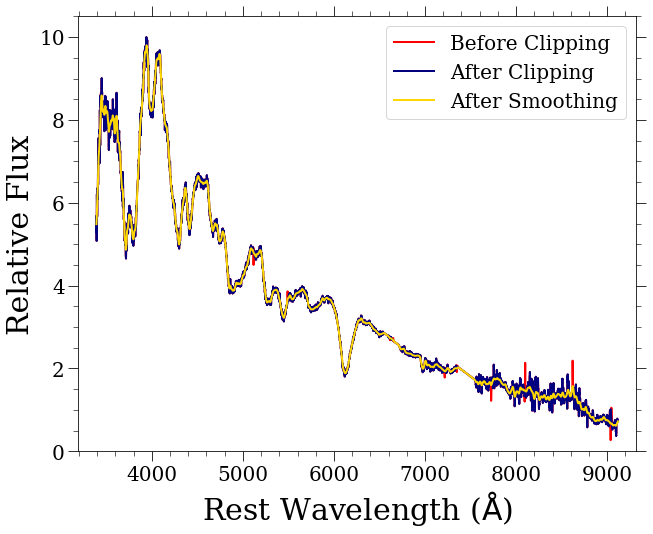

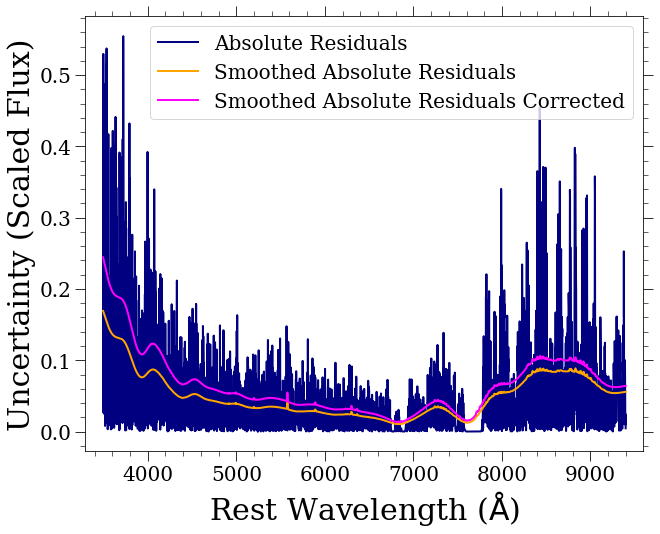

77.30745810419253
Av: 0.18197


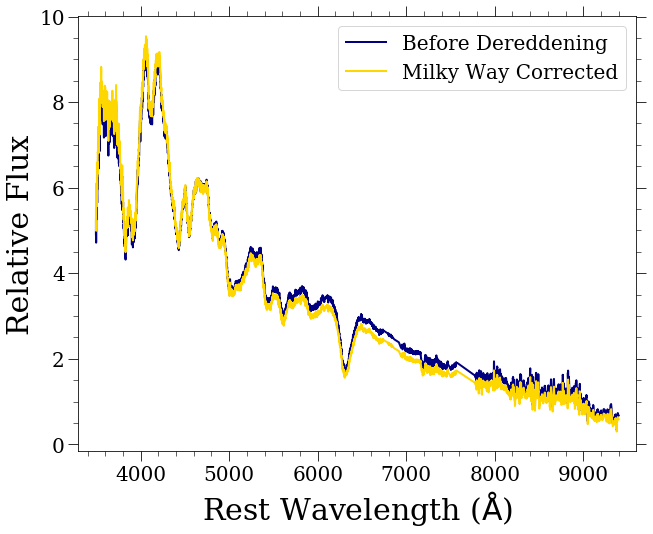

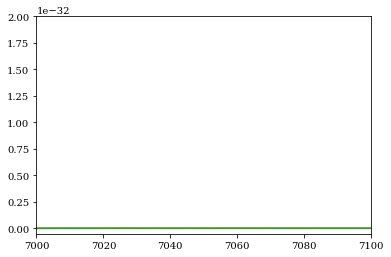

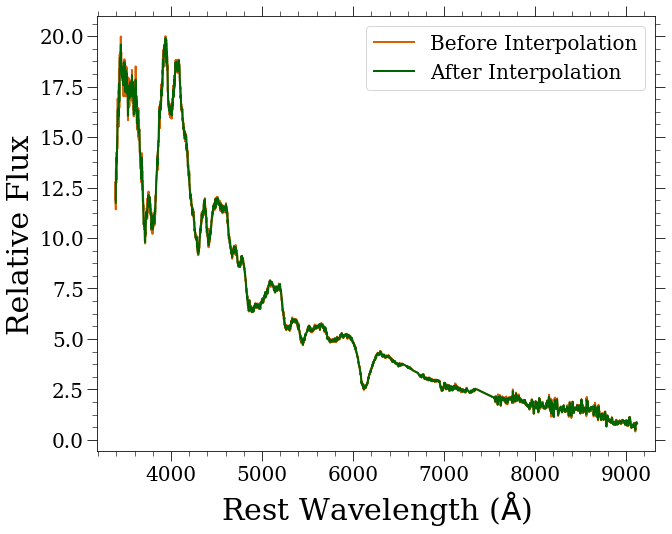

2017iez 2017iez_20171122_kast_Foundation.dat 58079.0 58082.777 -3.61089866157 0.046
0.003056928666426573 34.45372249635273


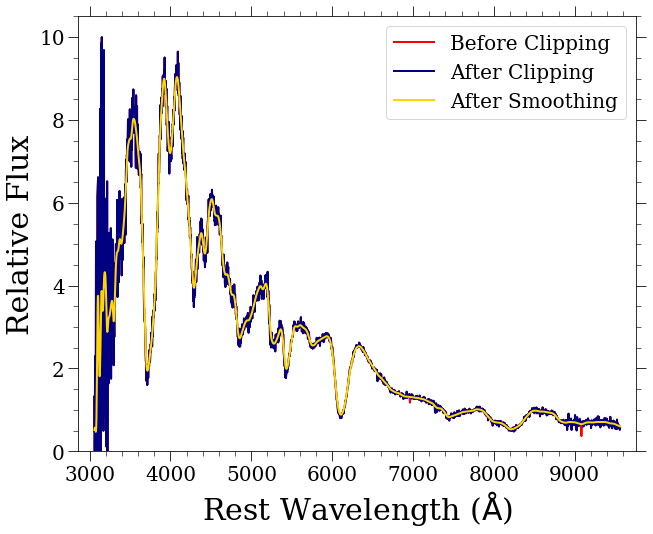

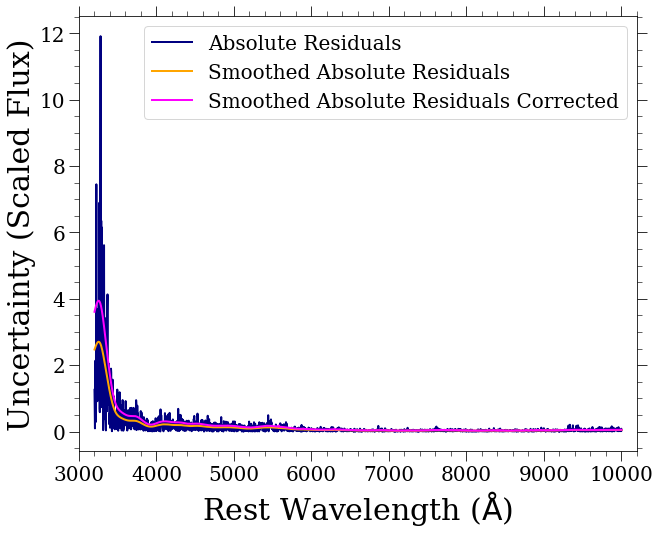

23.72760230746045


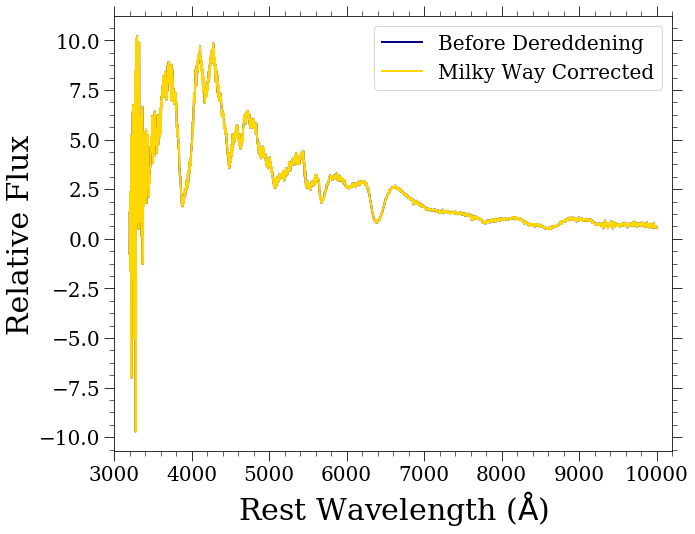

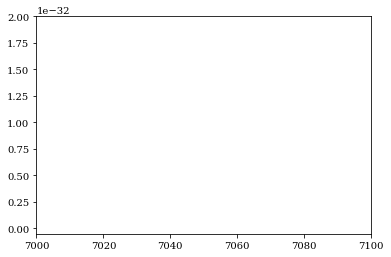

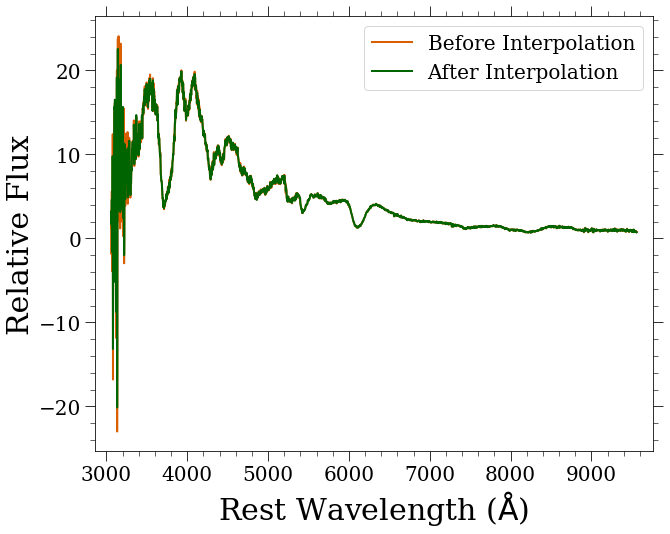

atlas16dpb ATLAS16dpb_20161102_FLWO_Foundation.dat 57694.0 57689.293 4.60081323064 0.02308
0.003544832628735098 23.65013475411932


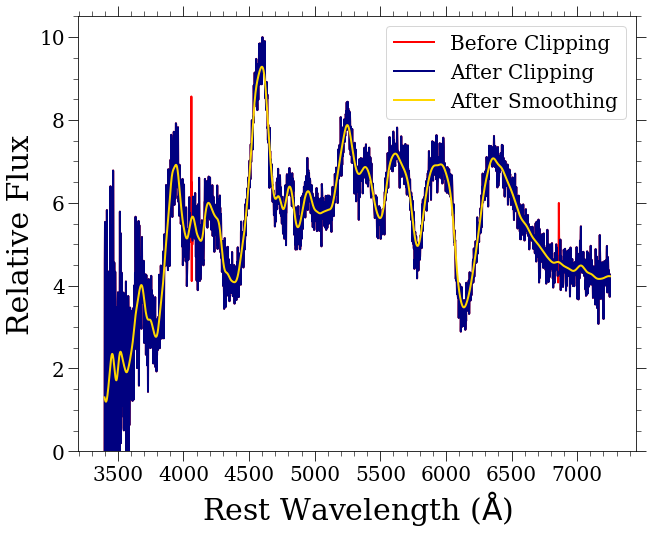

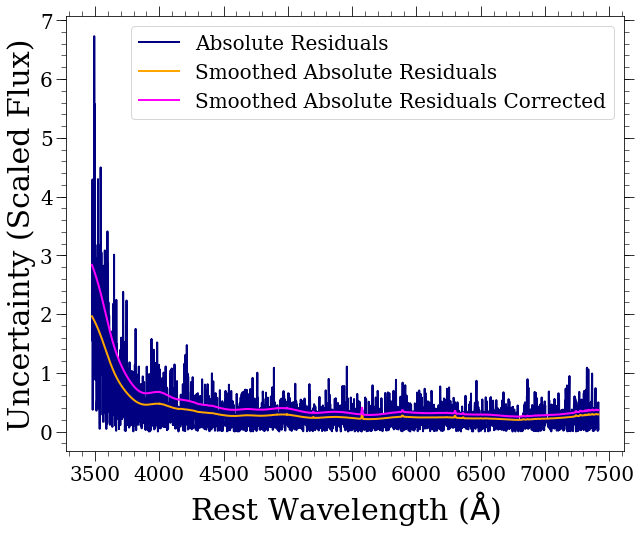

16.239562698470877
Av: 0.49941


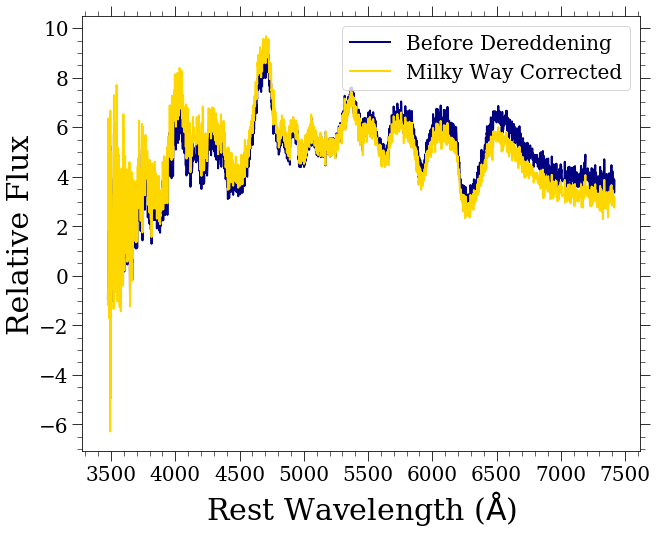

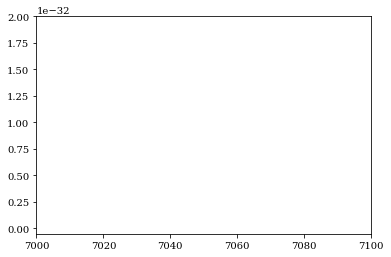

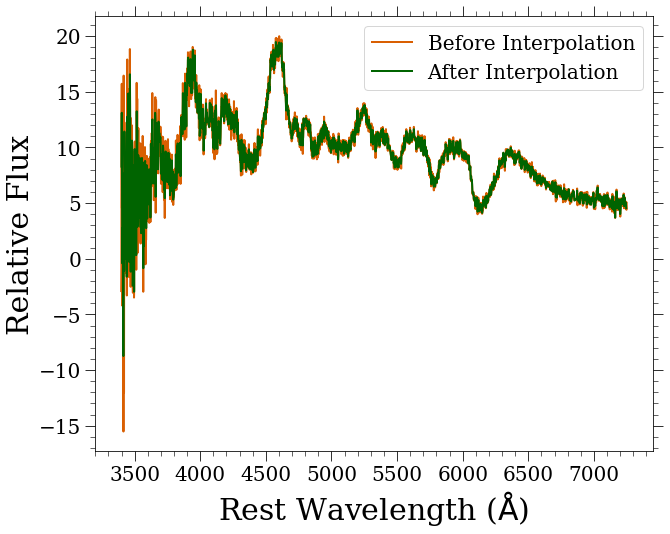

2016gfr 2016gfr_20160917_ALPHY_Foundation.dat 57648.0 57657.266 -9.11388918942 0.01669
0.001 102.83352972255153


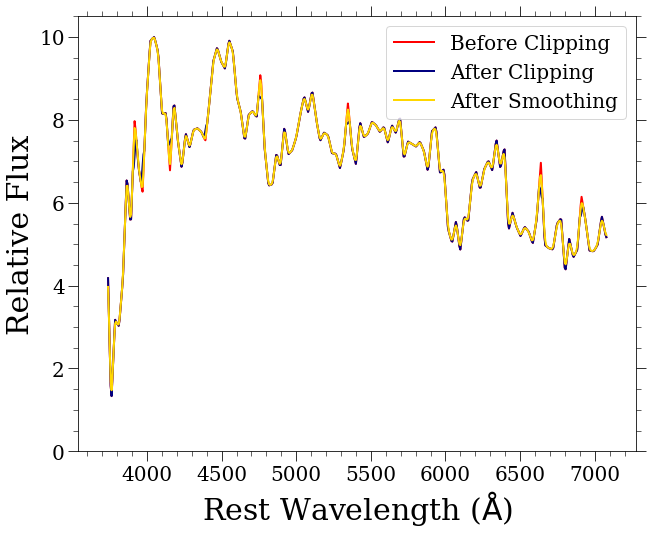

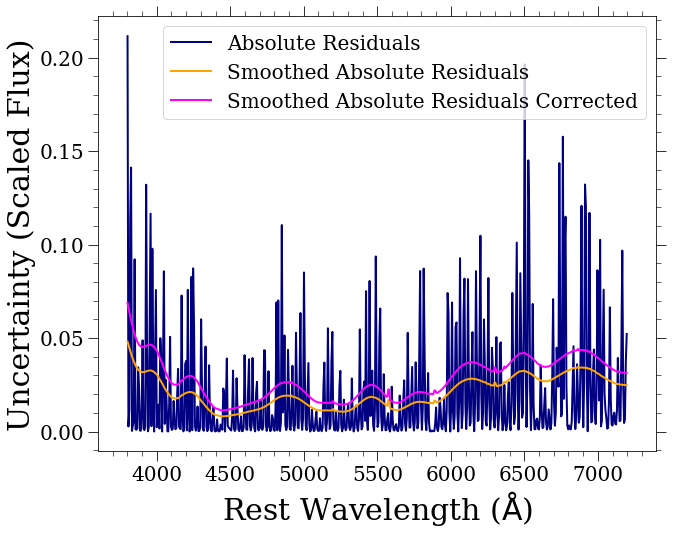

287.6716499673045
Av: 0.3565


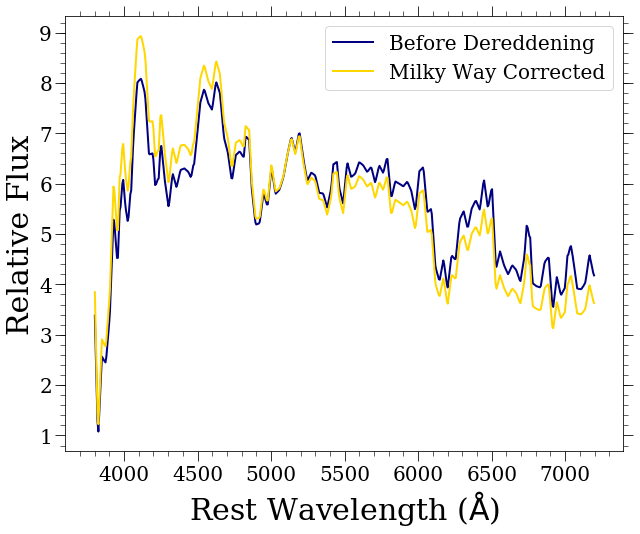

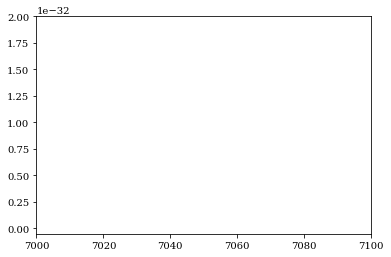

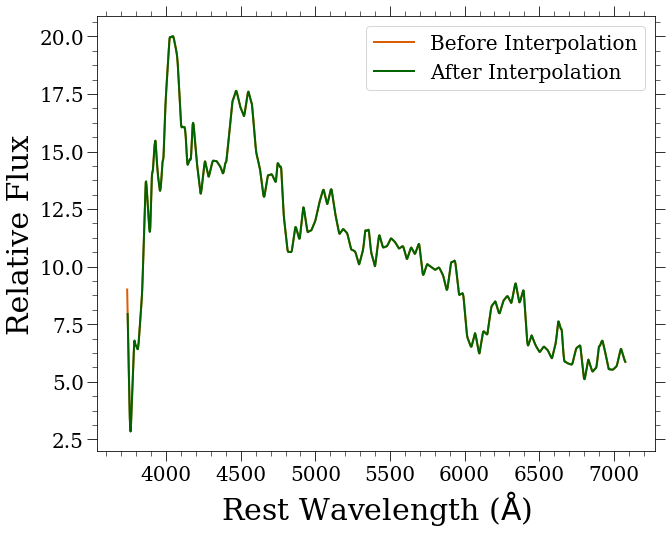

2018oh 2018oh_20180208_kast_Foundation.dat 58157.0 58162.215 -5.15316205533 0.012
0.001 146.81419160747362


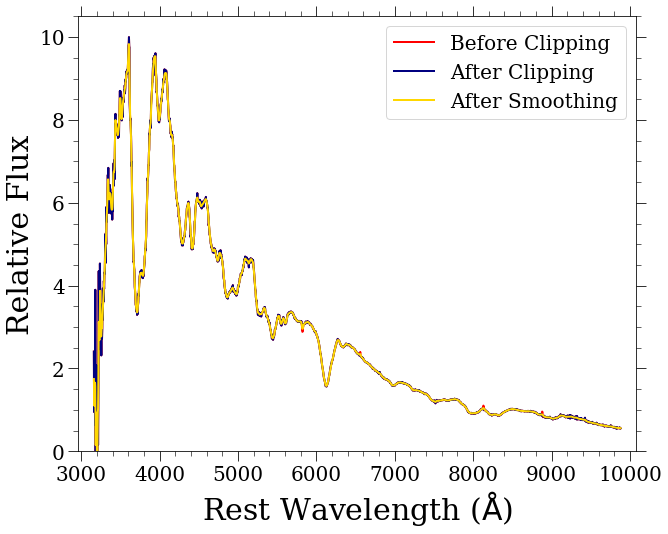

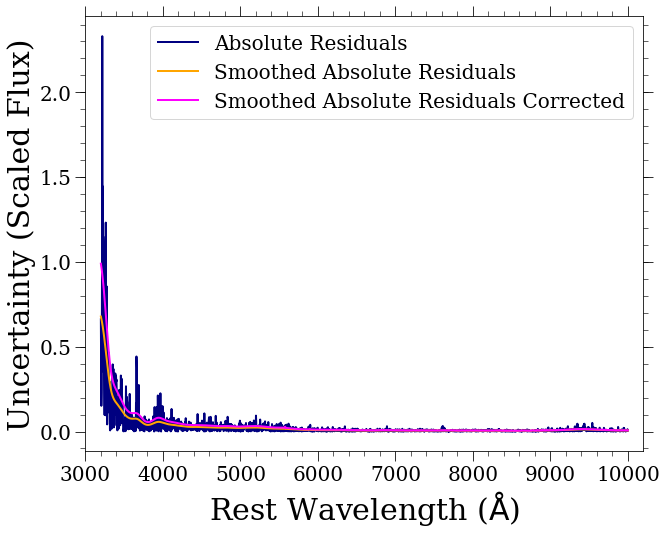

153.34726797634758


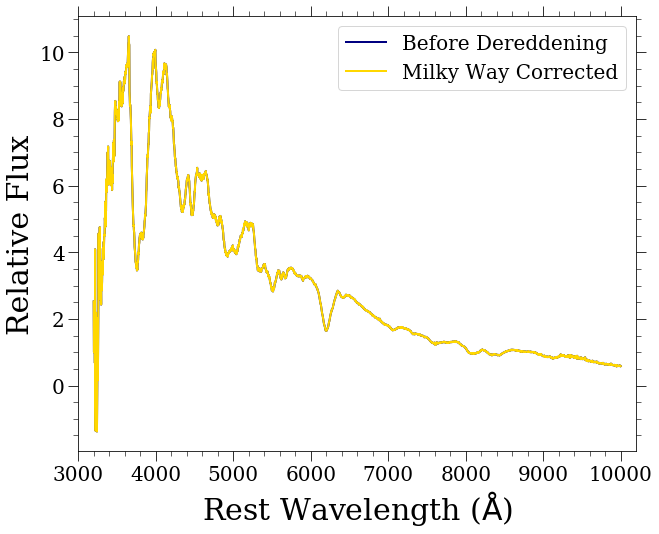

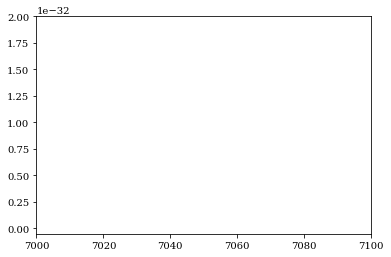

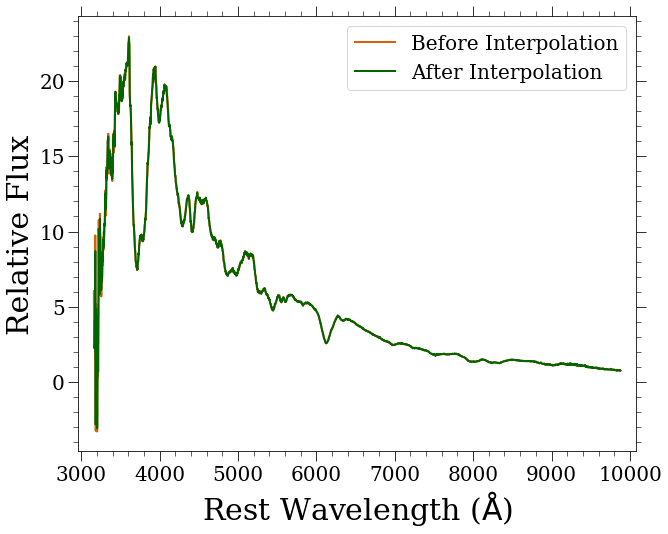

ps15akf ps15akf_20150517_goodman_Foundation.dat 57159.0 57163.984 -4.70801609643 0.0586283
0.001 84.1952699680672


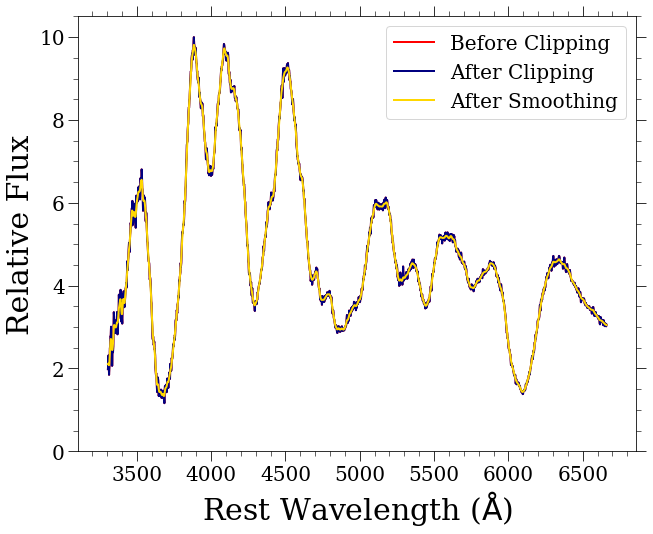

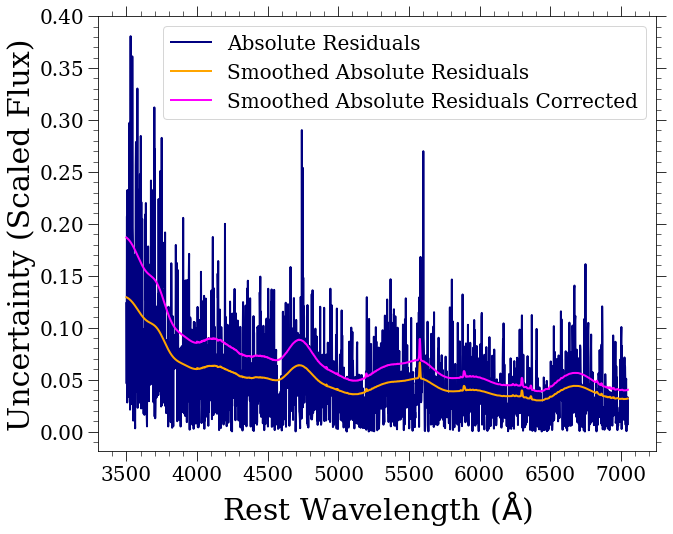

77.22458370185163
Av: 0.07905


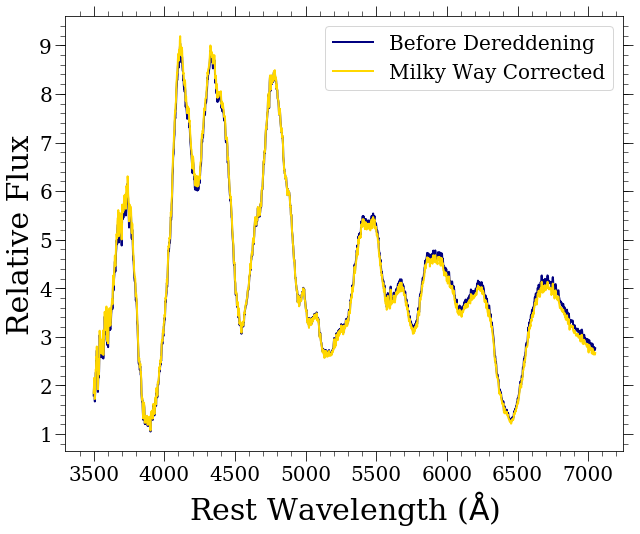

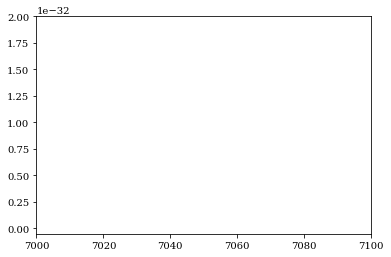

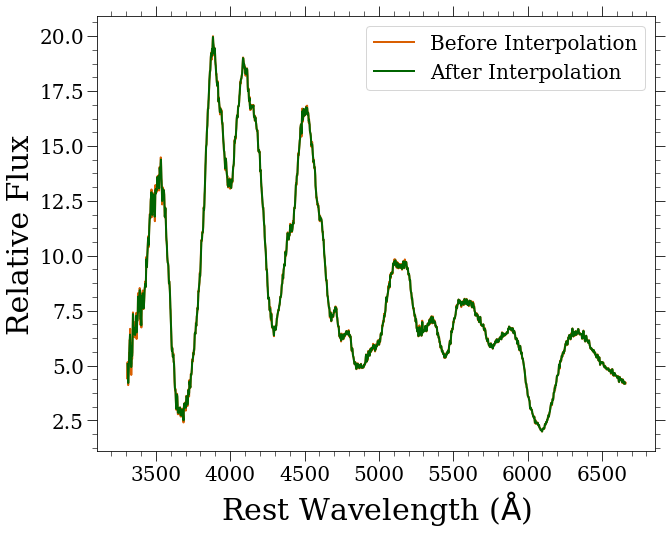

2018cnw 2018cnw_20180615_APO_Foundation.dat 58284.0 58298.398 -14.0578012107 0.0242
0.004462394726294008 3.3326882980133012


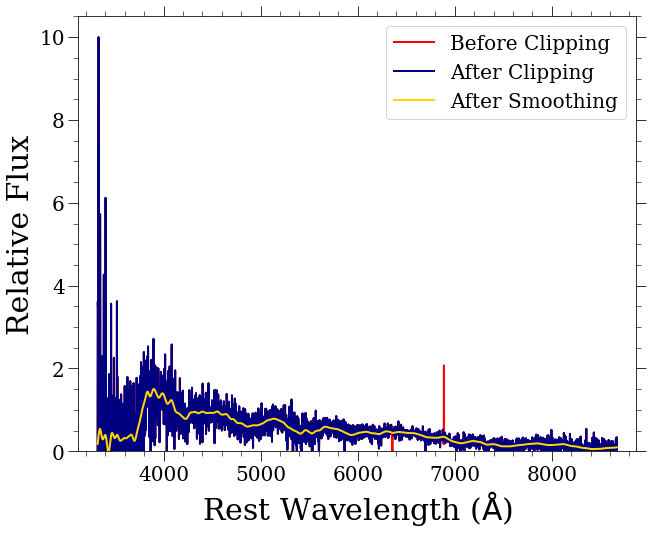

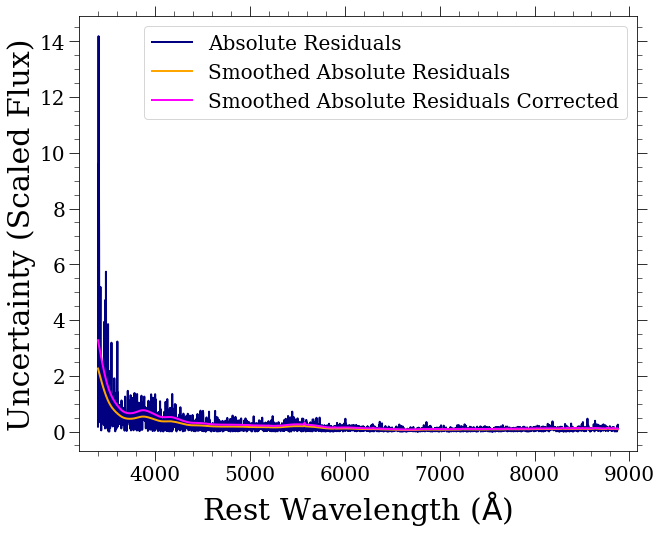

2.435715213241417


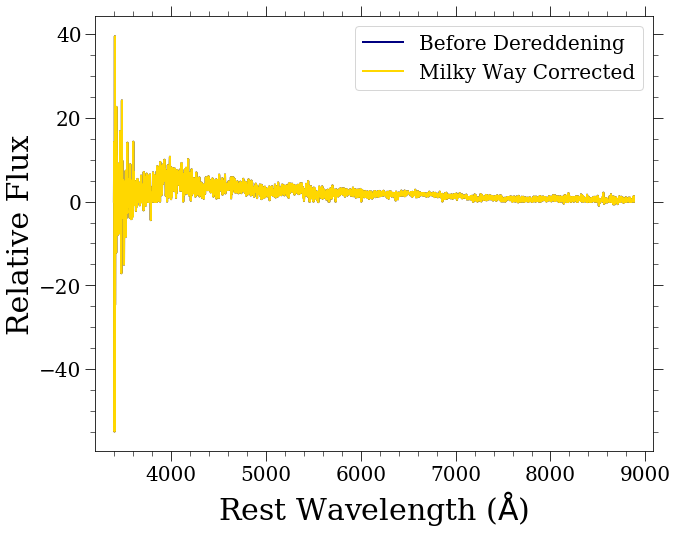

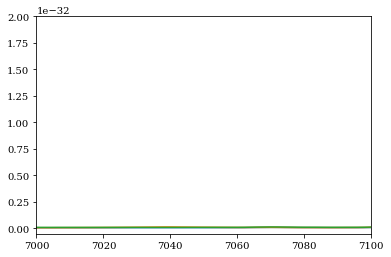

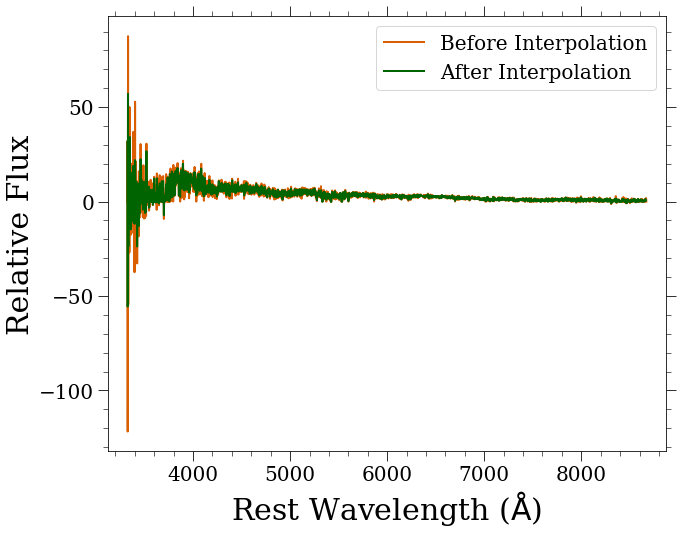

ps16eqv ps16eqv_20161027_SALT_Foundation.dat 57688.0 57683.887 3.79134250212 0.08484
0.001 132.39124818668103


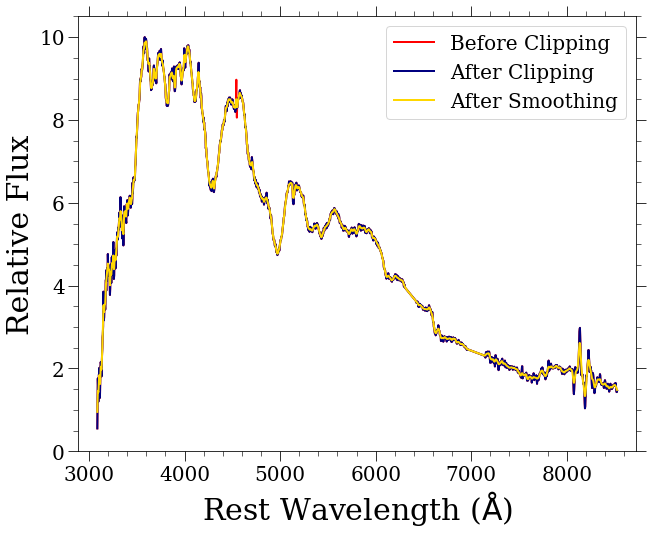

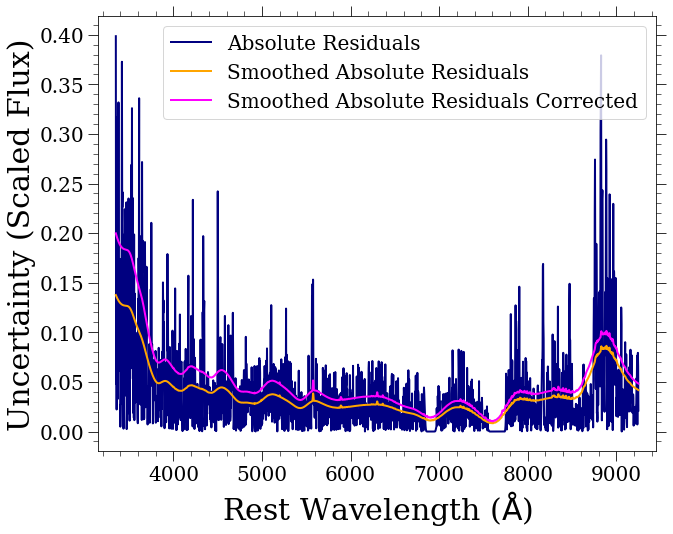

137.47183653100927
Av: 0.02077


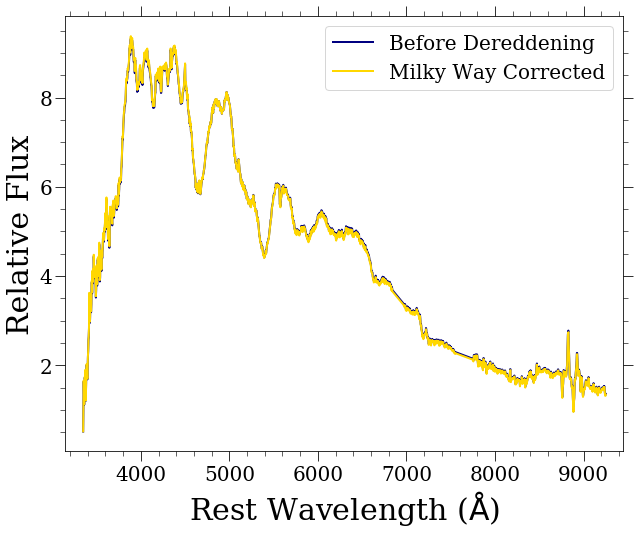

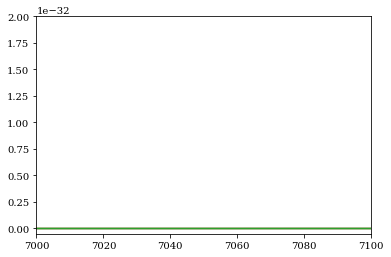

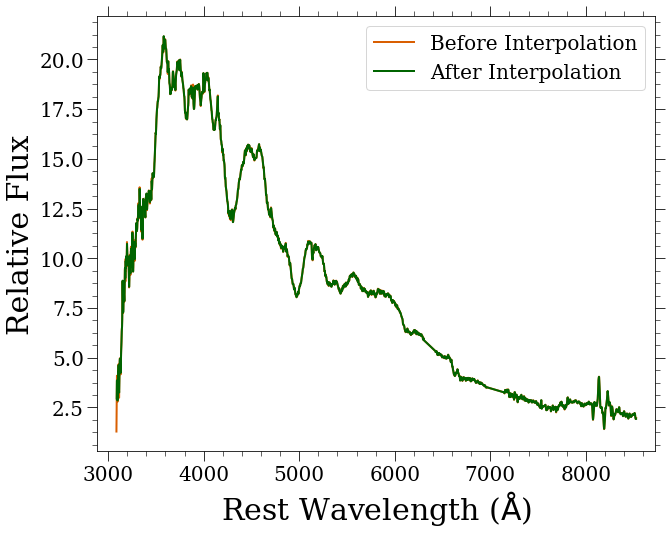

2016bew 2016bew_20160314_SALT_Foundation.dat 57461.0 57466.859 -5.55882352942 0.054
0.001 86.67885367256764


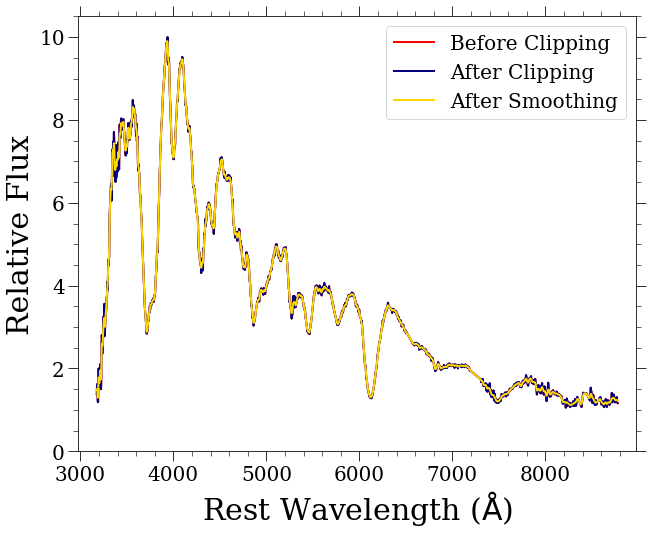

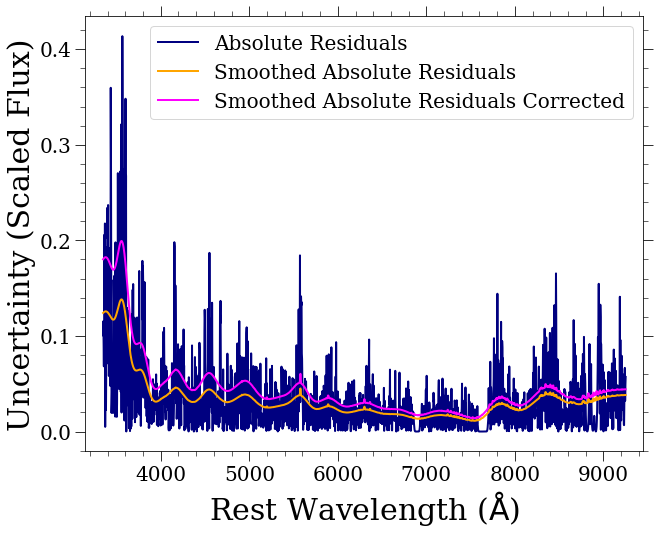

95.7054419358532


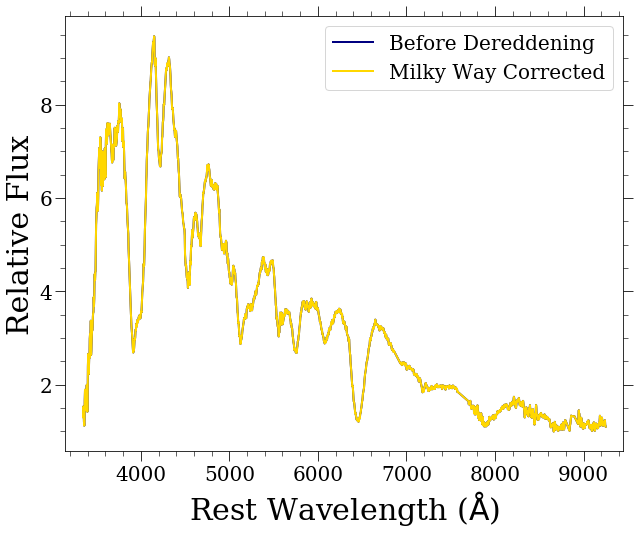

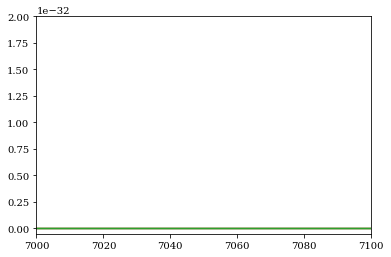

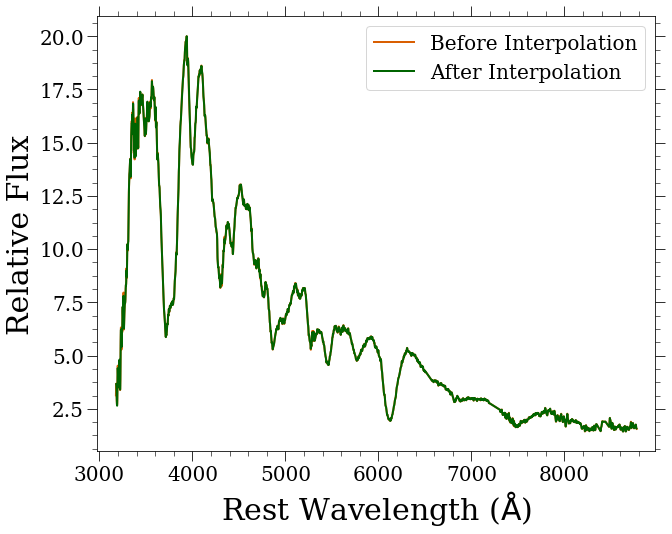

2017hju 2017hju_20171017_kosmos_Foundation.dat 58043.0 58051.602 -8.4168297456 0.022
0.0027263320233323345 41.77407673995677


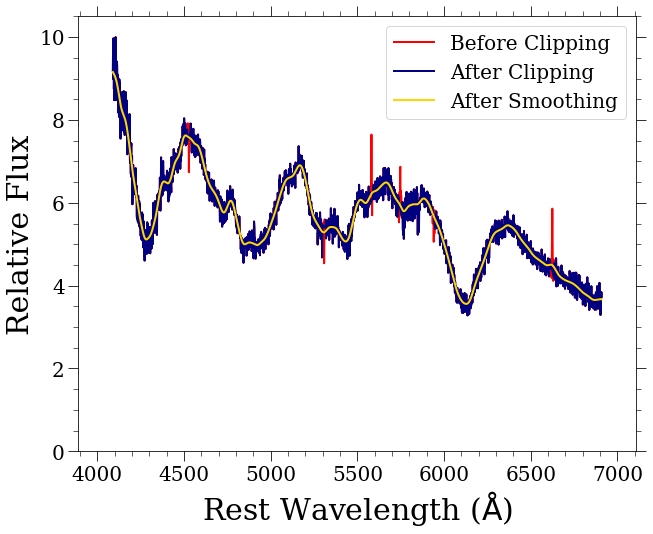

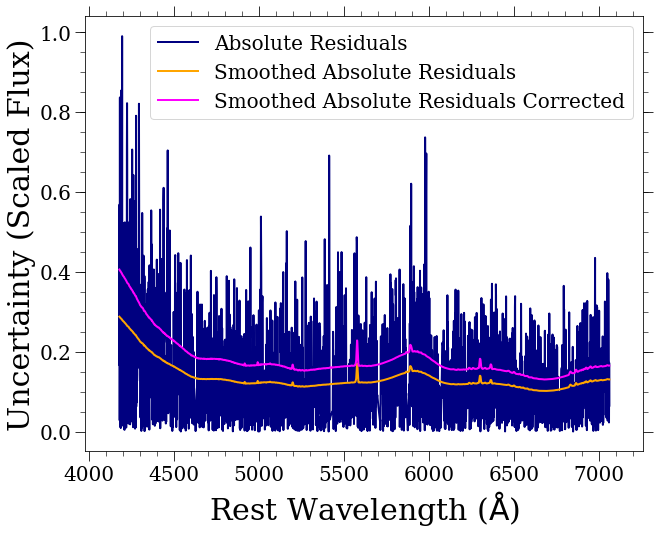

32.99438132303543


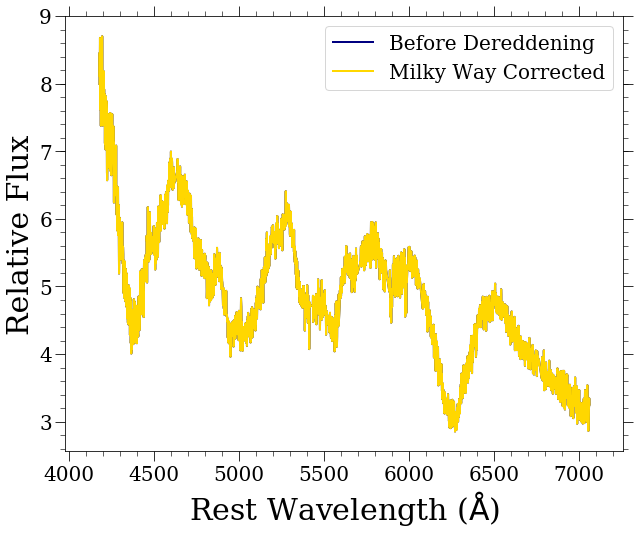

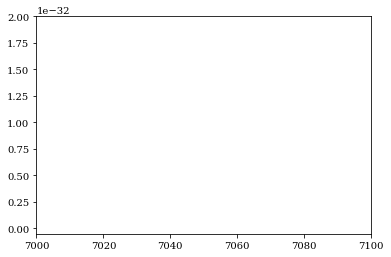

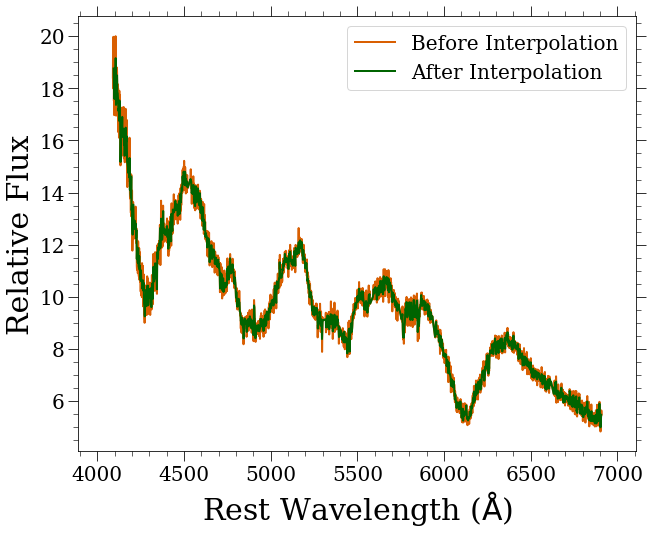

ps16fbb ps16fbb_20161125_SALT_Foundation.dat 57717.0 57719.5 -2.37529691211 0.0525
0.001 106.23832837464988


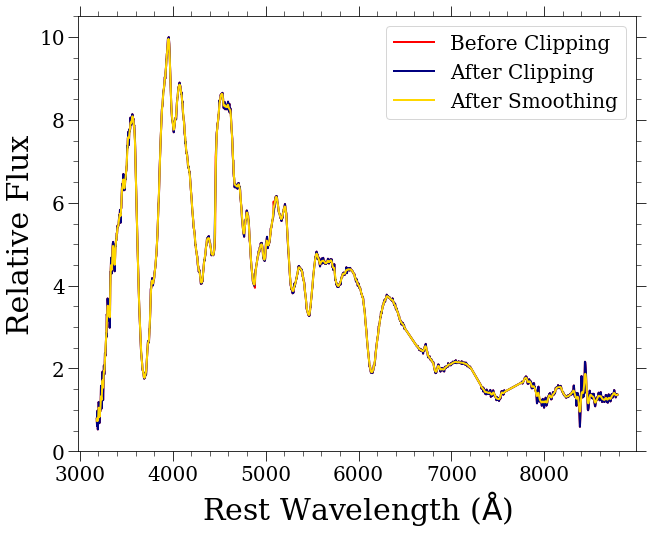

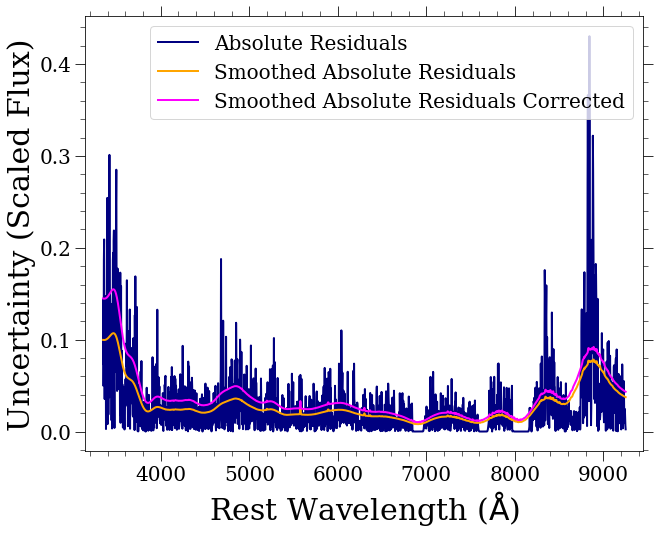

138.30638525705217
Av: 0.05425


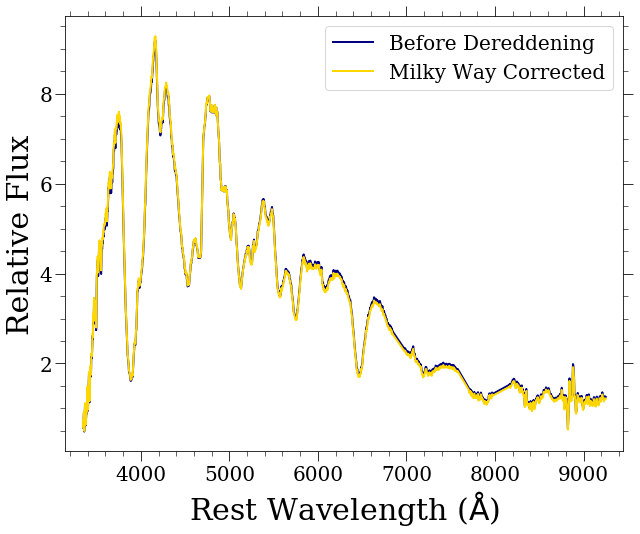

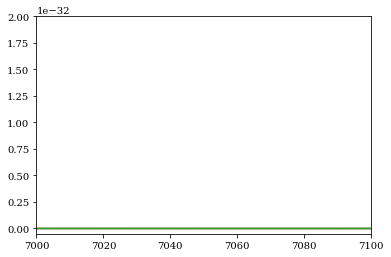

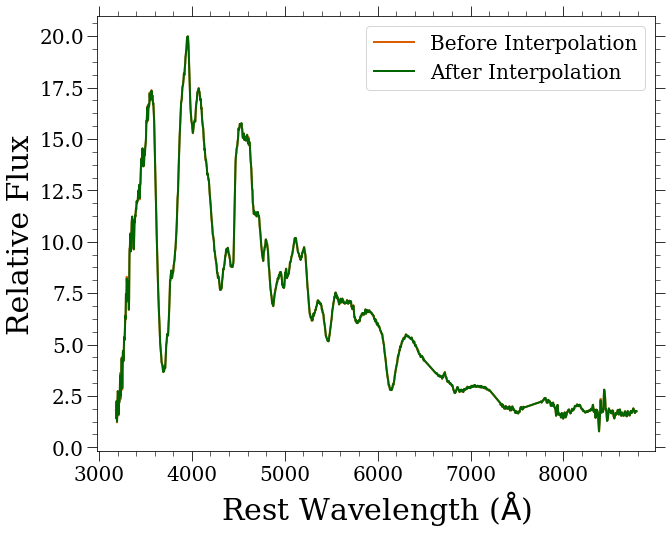

ps15asb ps15asb_20150724_goodman_Foundation.dat 57227.0 57194.621 30.8774305522 0.04863
0.0040424586818985815 12.631272142847049


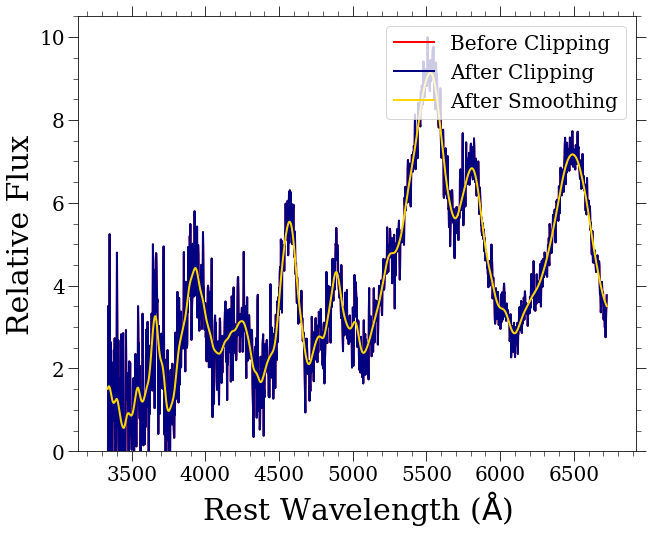

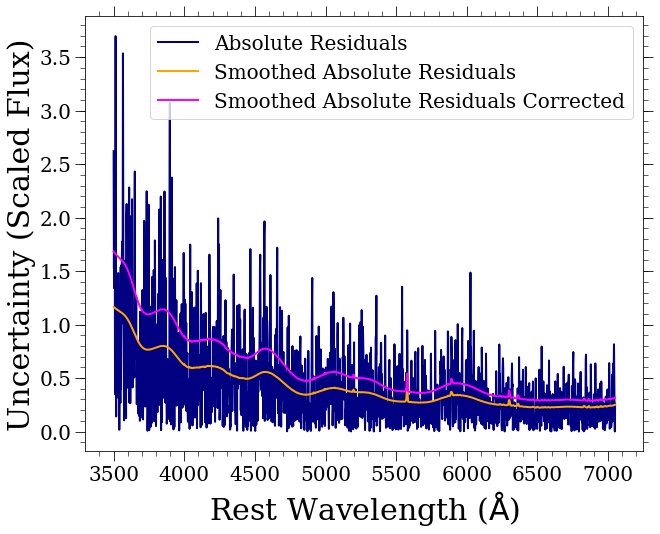

7.941350215782258
Av: 0.14167


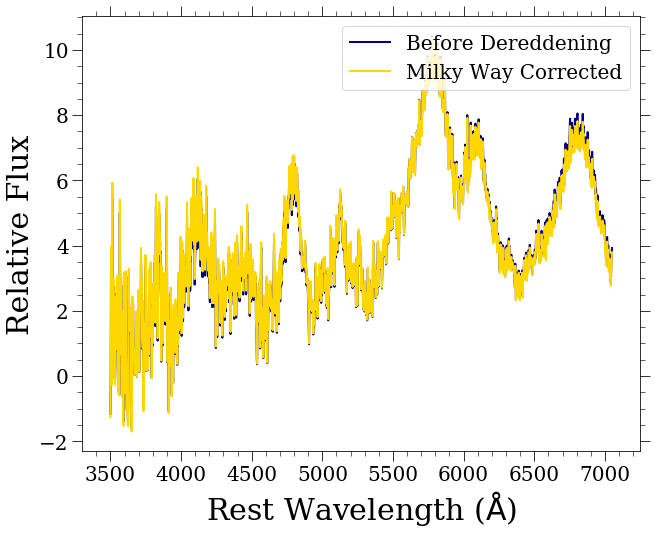

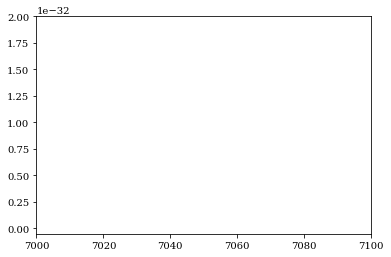

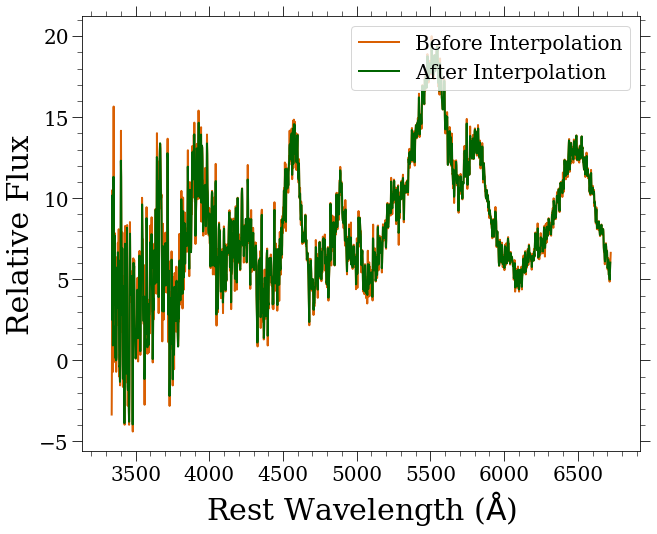

asassn15np asassn15np_20150821_goodman_Foundation.dat 57255.0 57236.969 17.3658865453 0.0383
0.003528840101785347 24.00425499389801


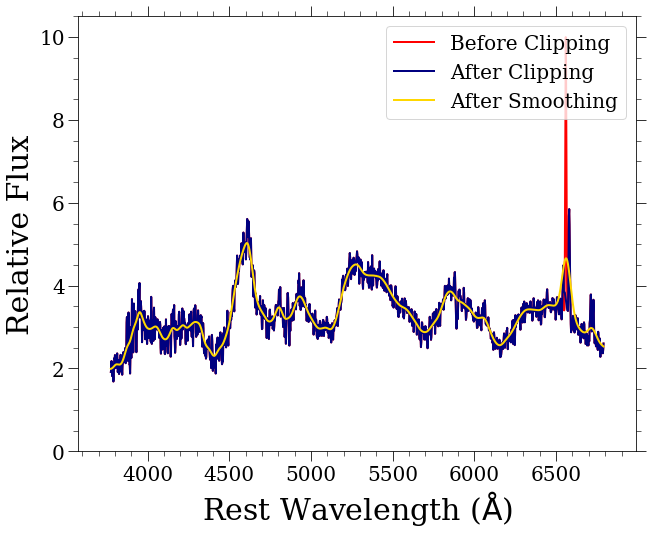

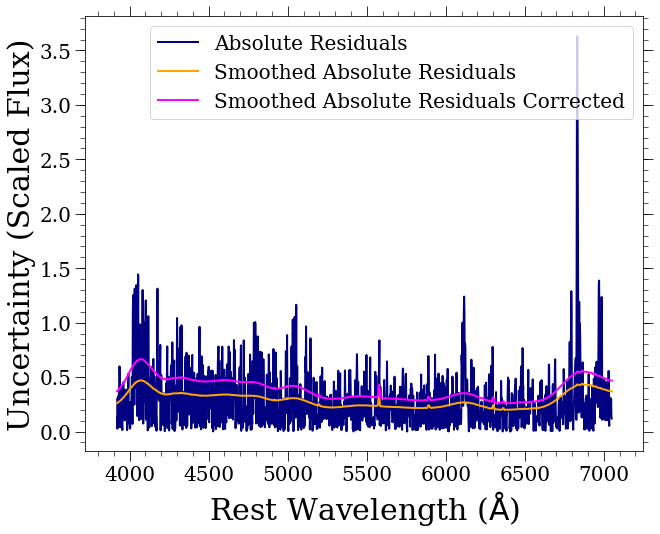

16.711596128696485
Av: 0.08215


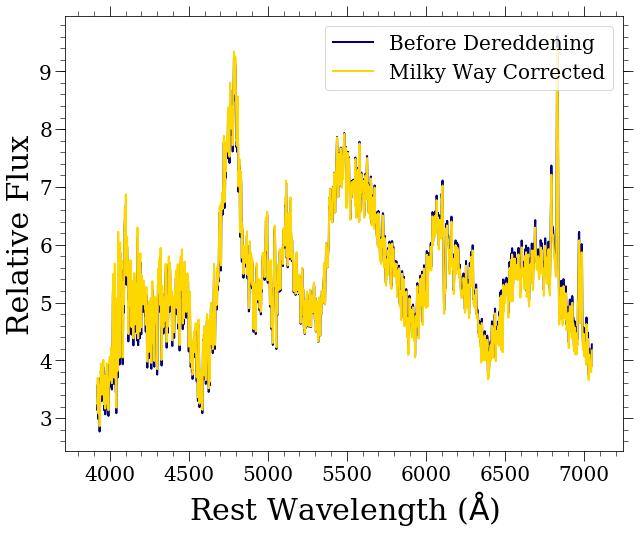

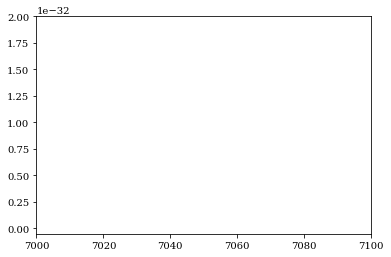

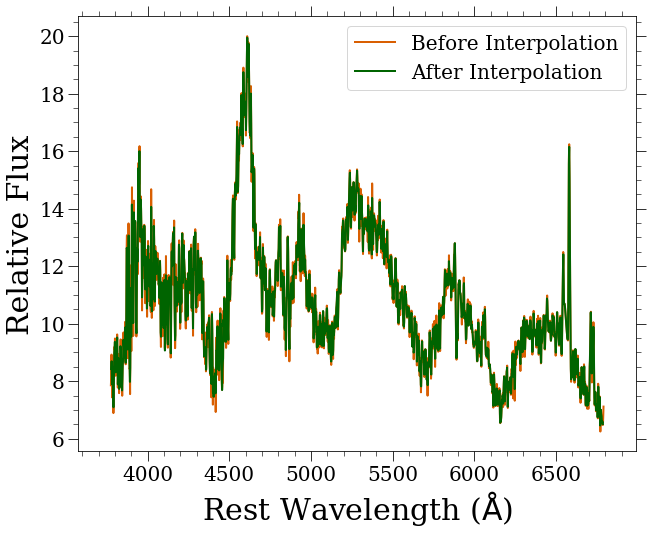

ps15adh ps15adh_20150517_goodman_Foundation.dat 57159.0 57136.645 20.2702090039 0.102757
0.0034380170944171467 26.015335872342277


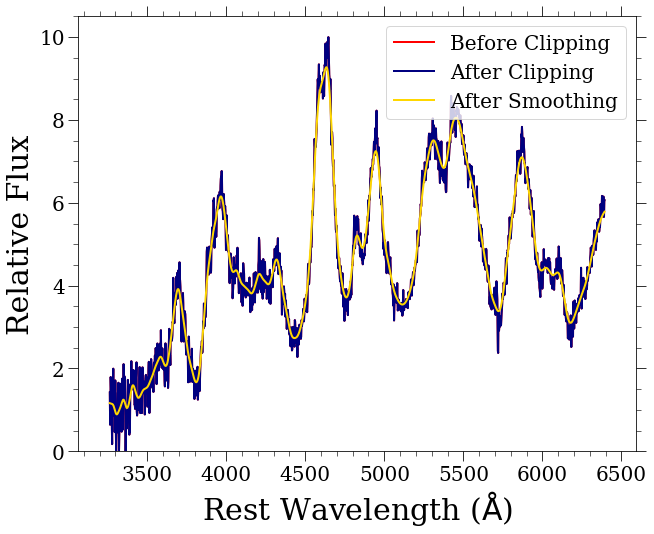

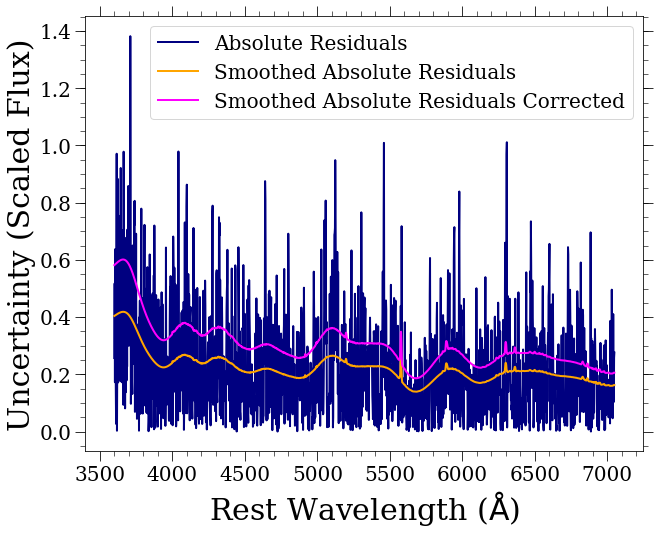

16.151533691646726
Av: 0.0806


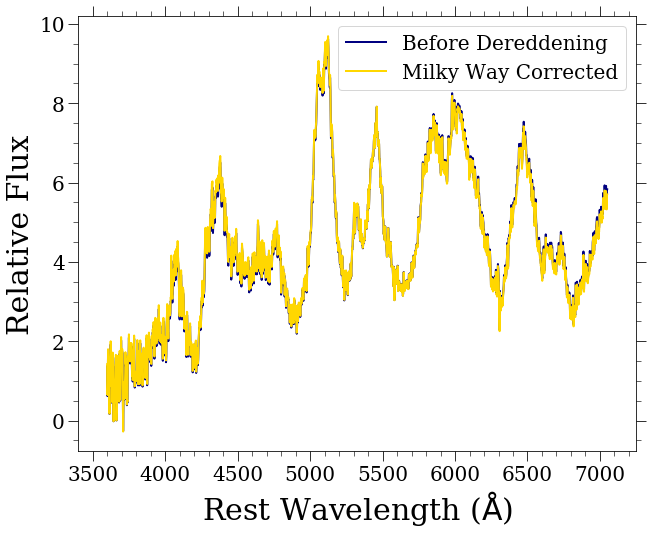

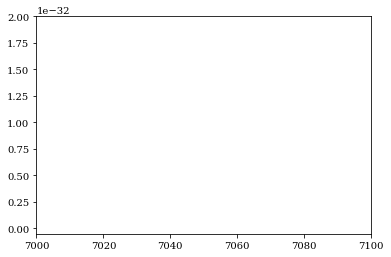

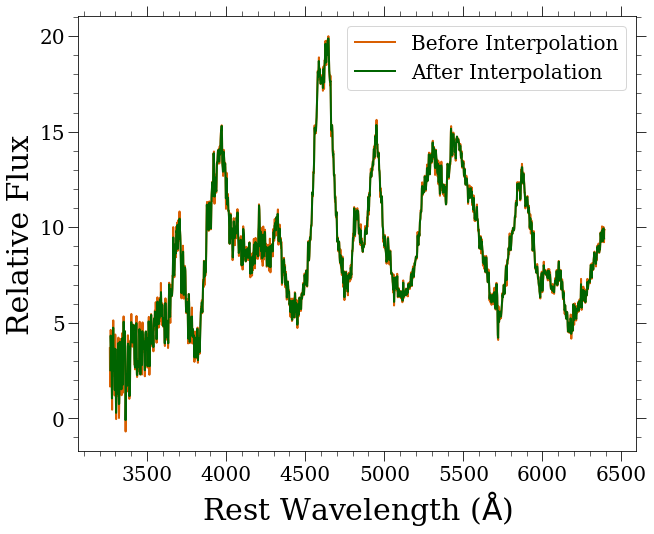

2018pj 2018pj_20180208_kast_Foundation.dat 58157.0 58150.531 6.1317535545 0.055
0.003692160439176956 20.387876092704193


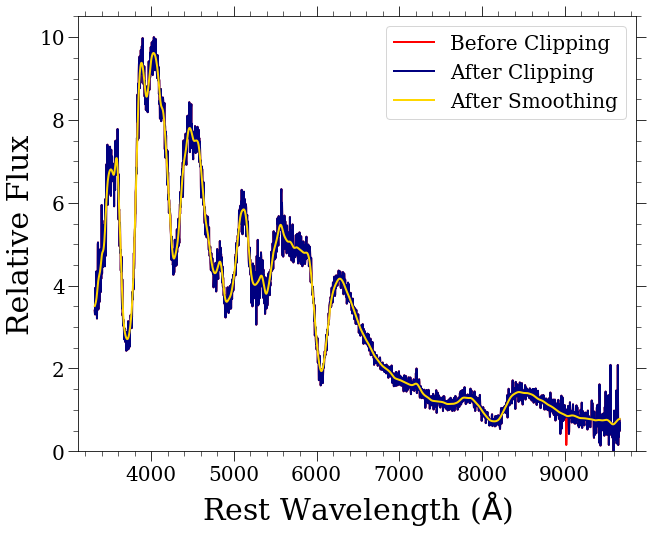

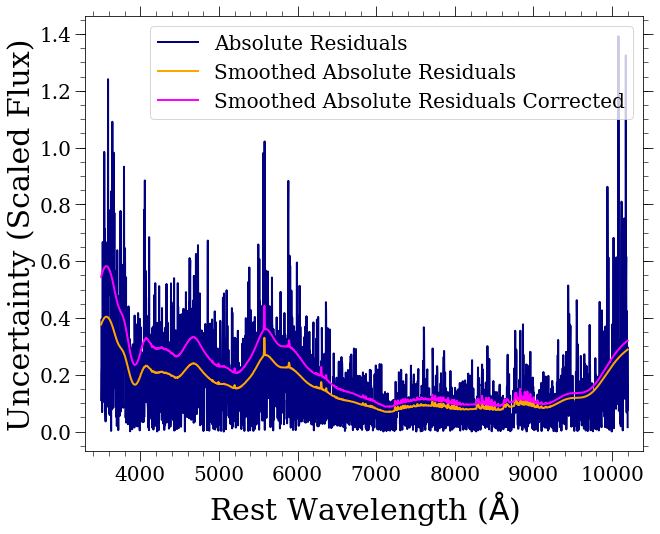

14.165876437729287


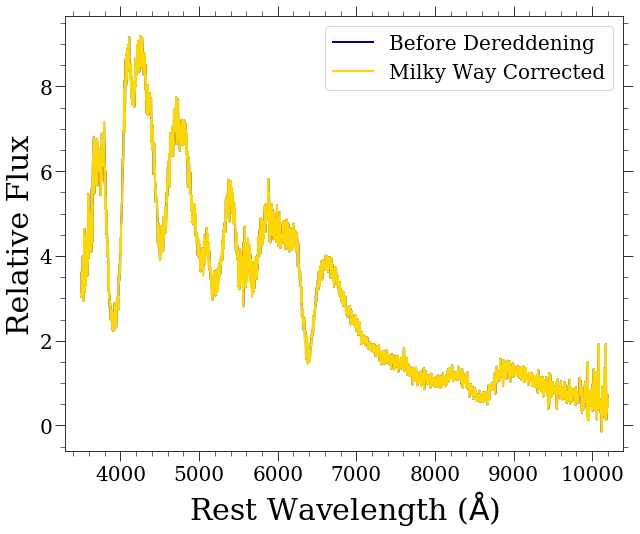

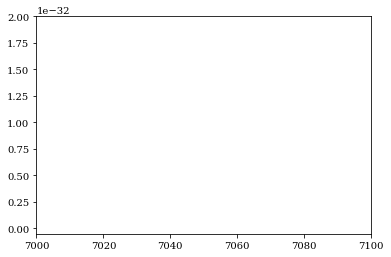

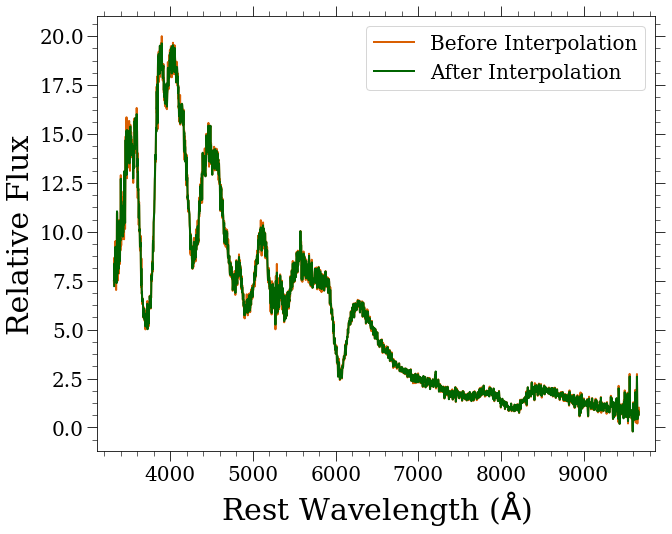

2017po 2017po_20170131_kosmos_Foundation.dat 57784.0 57784.492 -0.476744186045 0.0318278
0.0017311281225506313 63.81073455399853


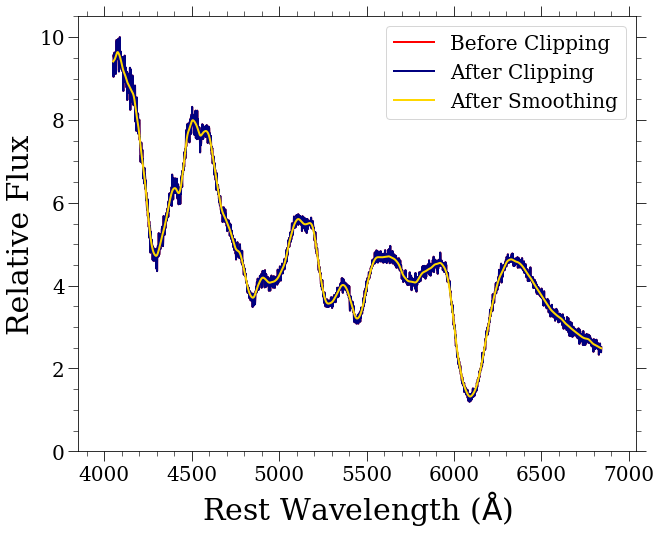

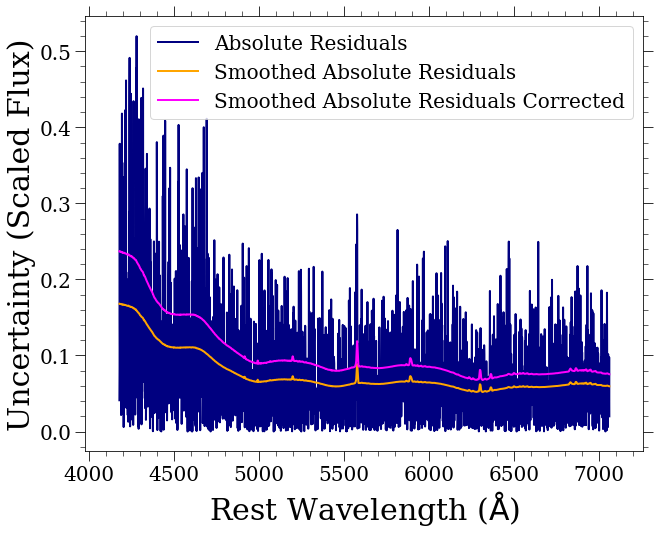

47.17739513733529
Av: 0.03658


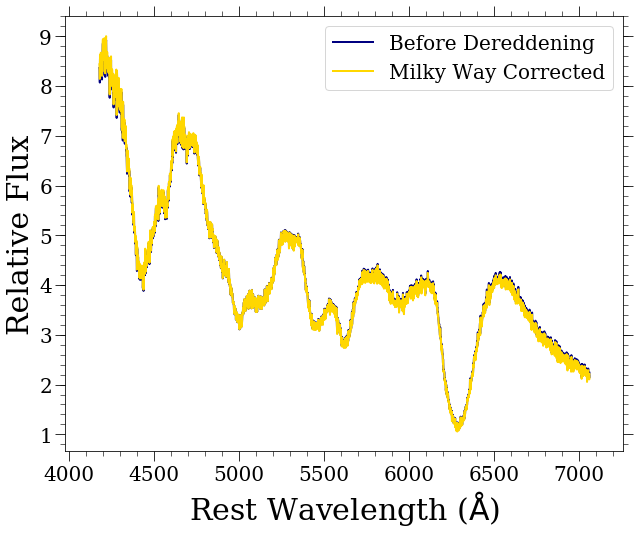

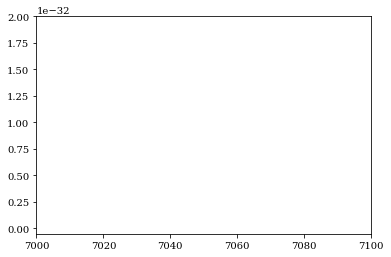

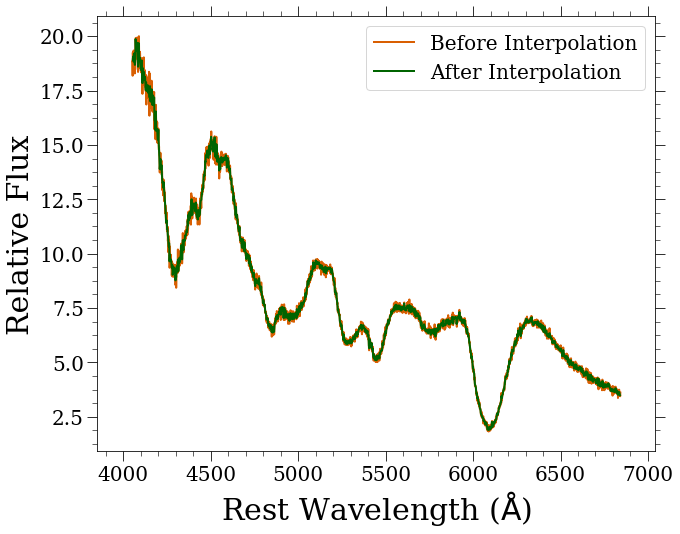

2017fnz 2017fnz_20170722_kast_Foundation.dat 57956.0 57958.887 -2.67067530065 0.081
0.004379395062703764 5.170537992716187


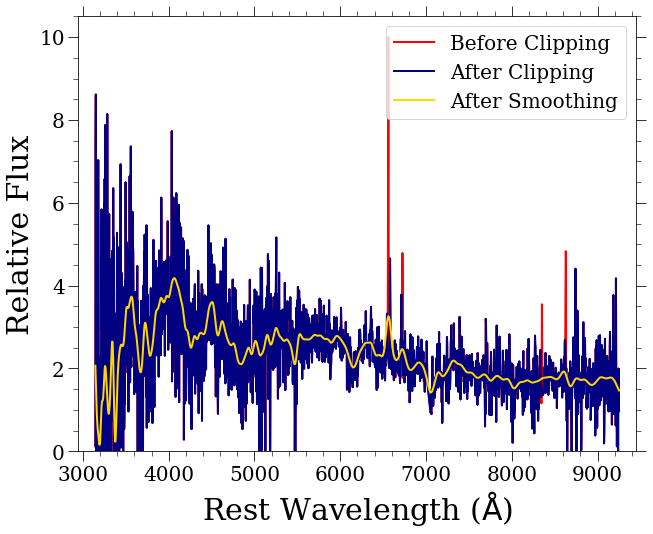

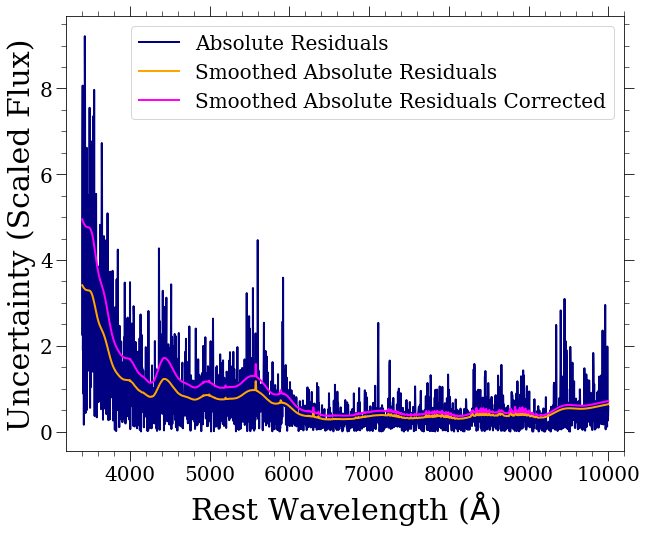

3.839118922683766


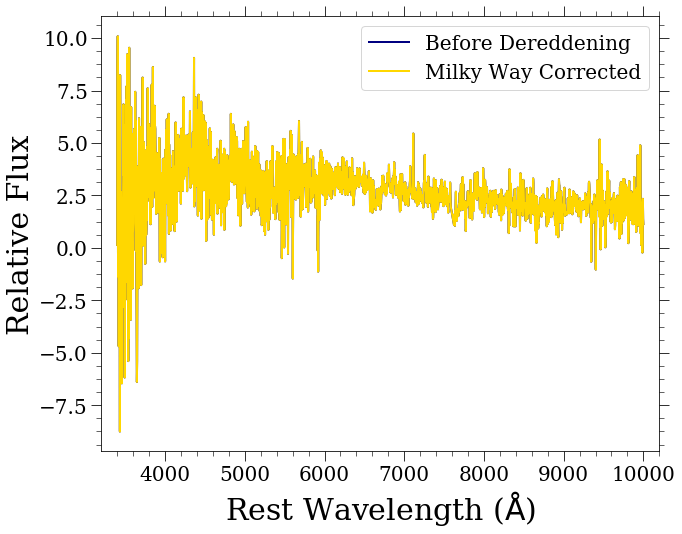

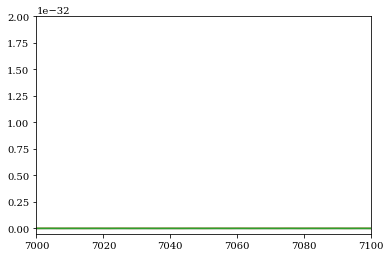

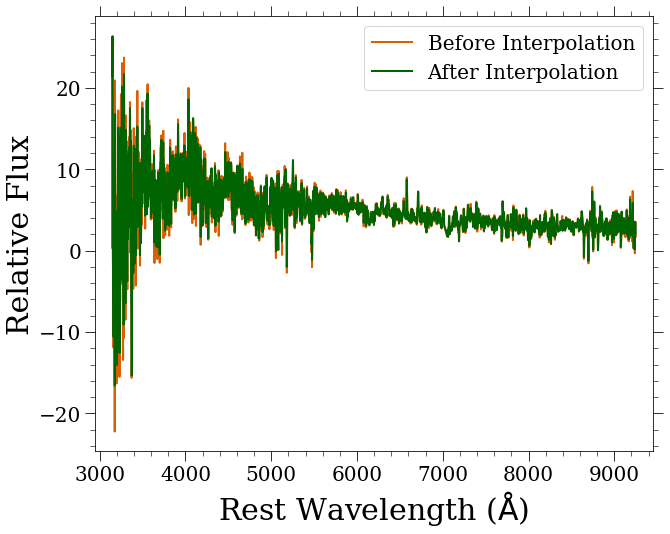

2017oz 2017oz_20170131_kosmos_Foundation.dat 57784.0 57787.988 -3.77651515151 0.0556886
0.0025801940686940145 45.00998859428039


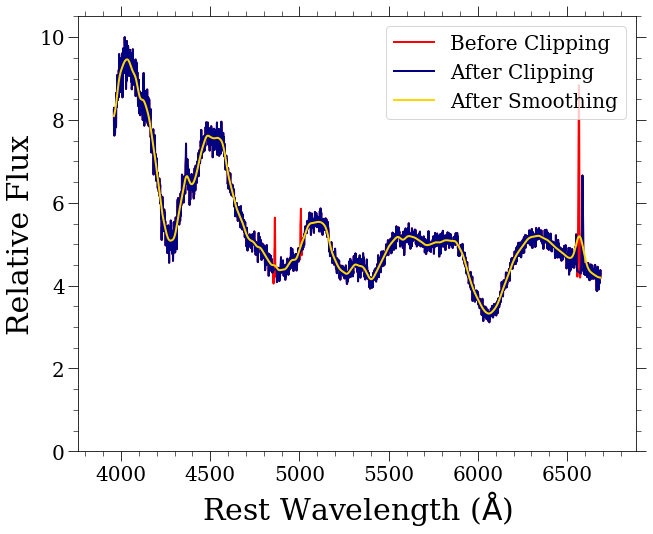

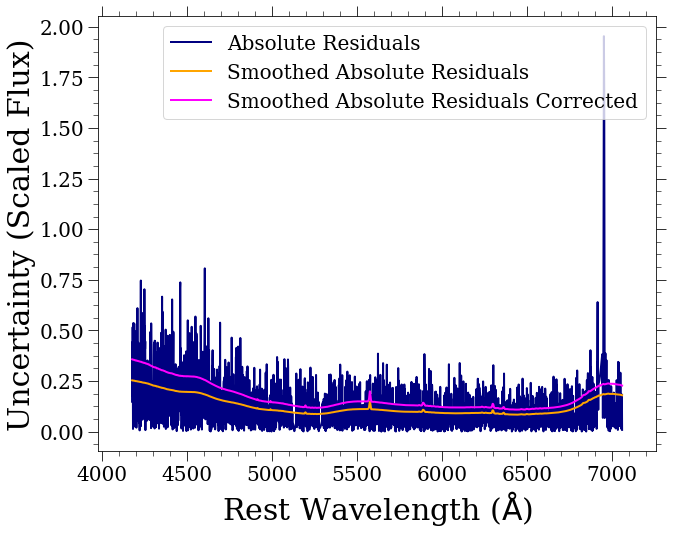

34.80844905715523
Av: 0.0341


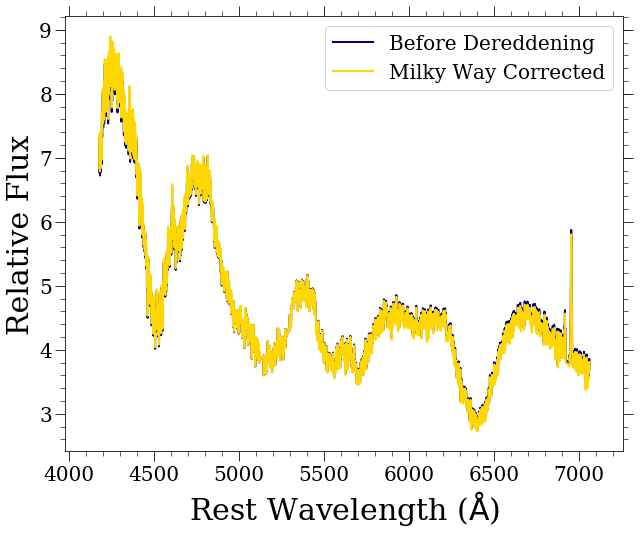

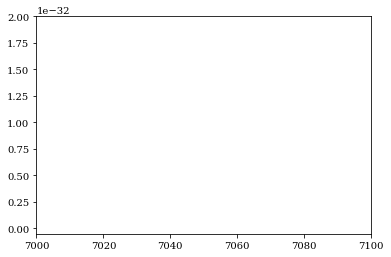

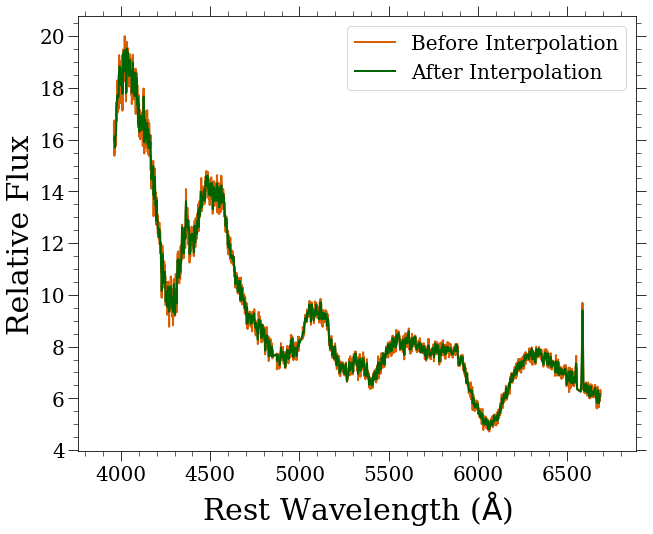

asassn16dn asassn16dn_20160402_fast_Foundation.dat 57480.0 57489.852 -9.72700794787 0.01285
0.0030775565849549074 33.996961442996955


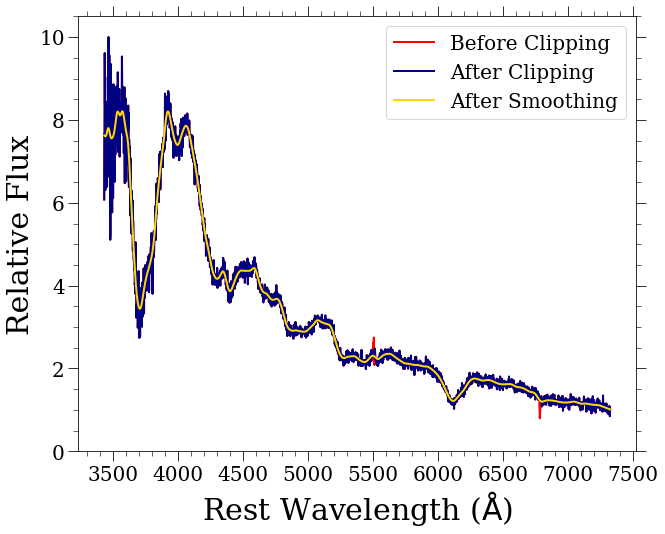

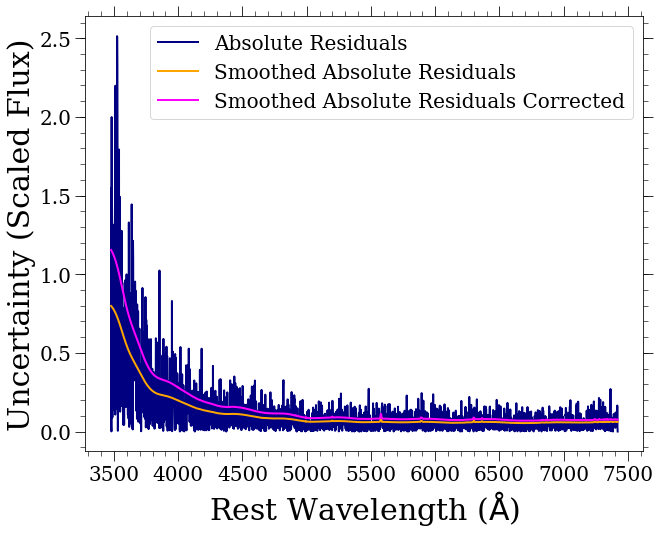

25.479656712022717
Av: 0.10199


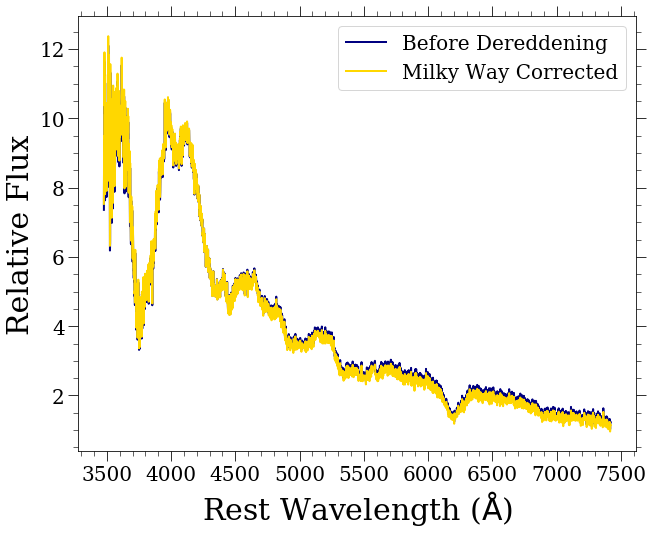

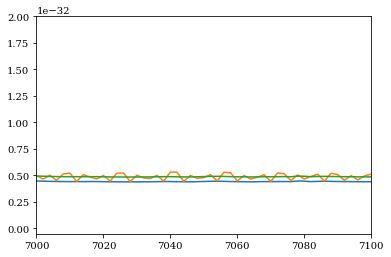

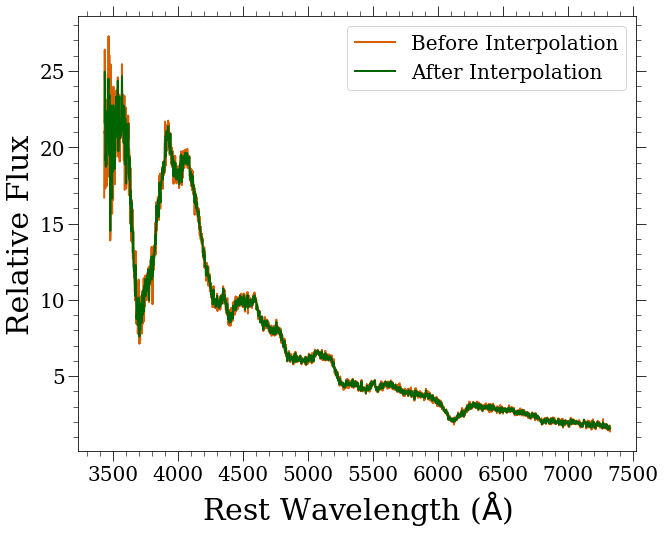

2016glz 2016glz_20161030_goodman_Foundation.dat 57691.0 57664.344 25.6063939135 0.04099
0.0013532366002080081 72.17833255291184


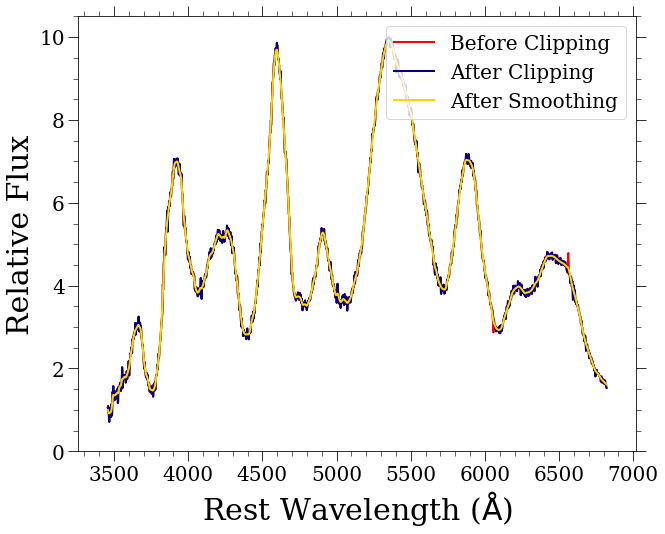

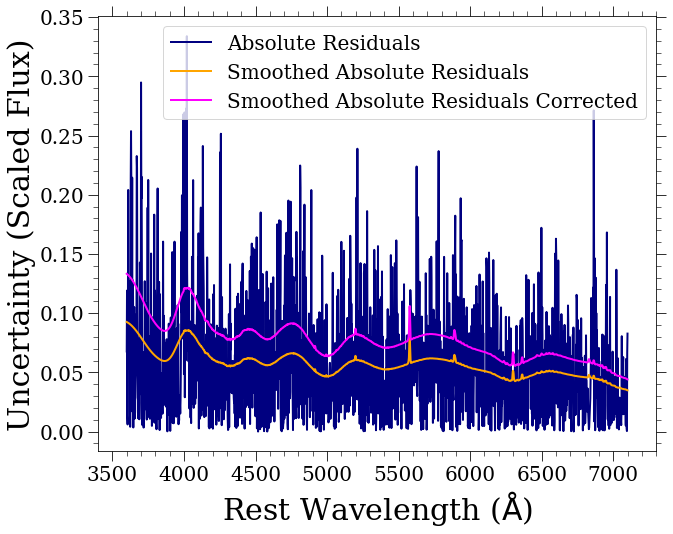

60.17908587163884
Av: 0.22072


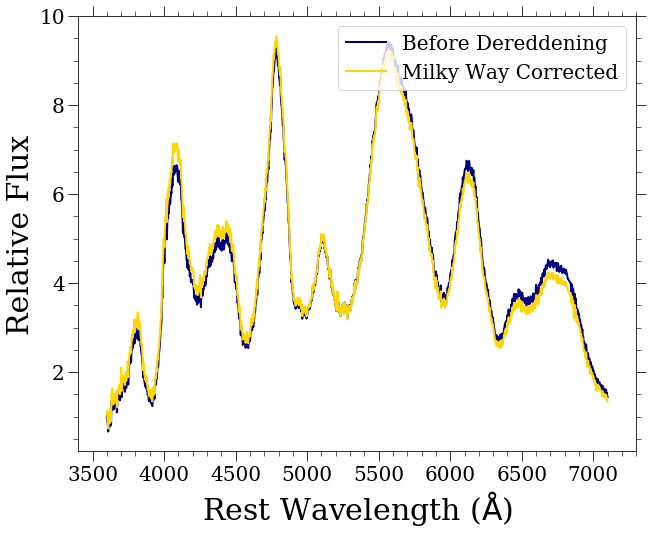

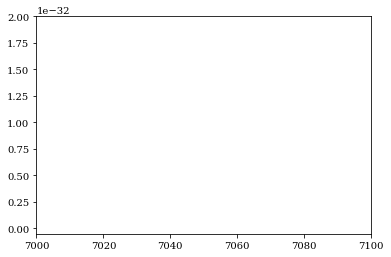

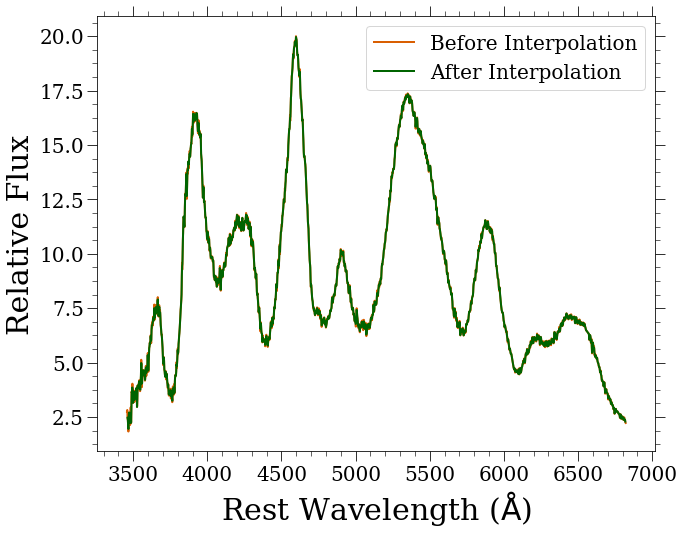

asassn15od asassn15od_20150821_goodman_Foundation.dat 57255.0 57256.582 -1.55463378155 0.017603
0.001 125.05700031942851


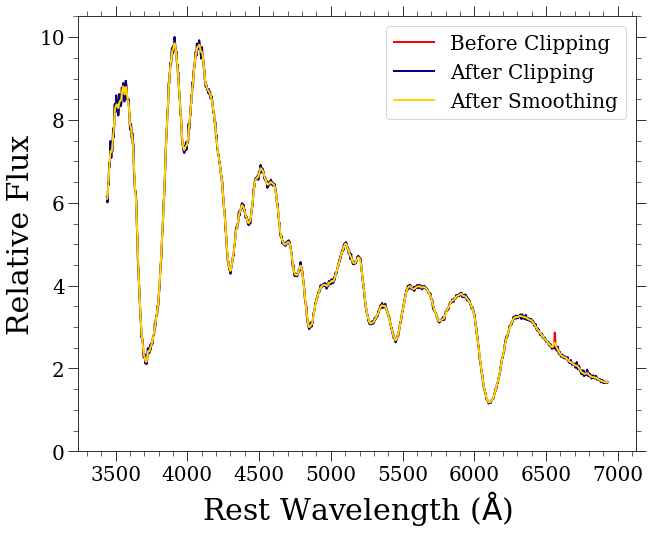

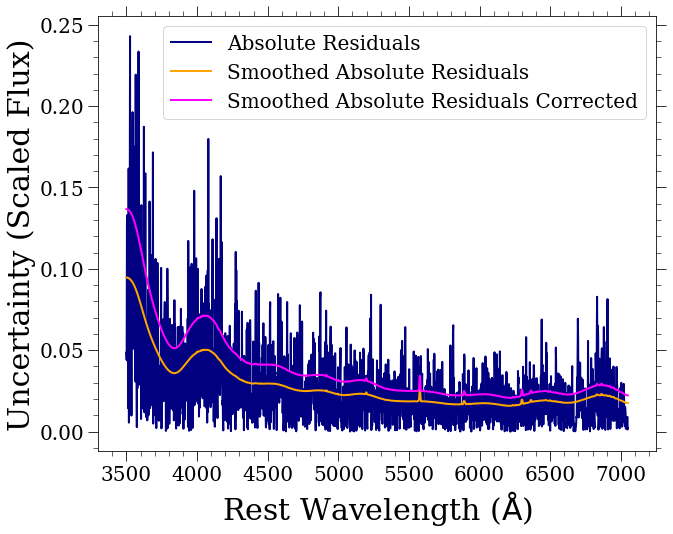

129.32857898783362
Av: 0.07936


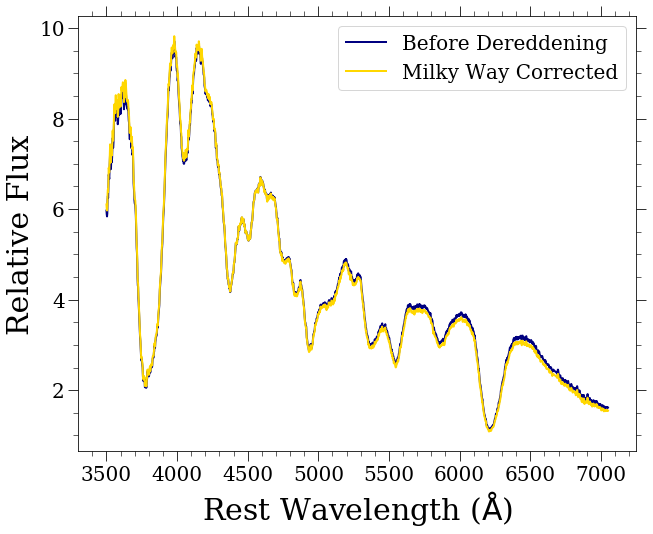

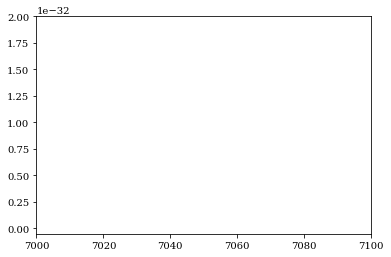

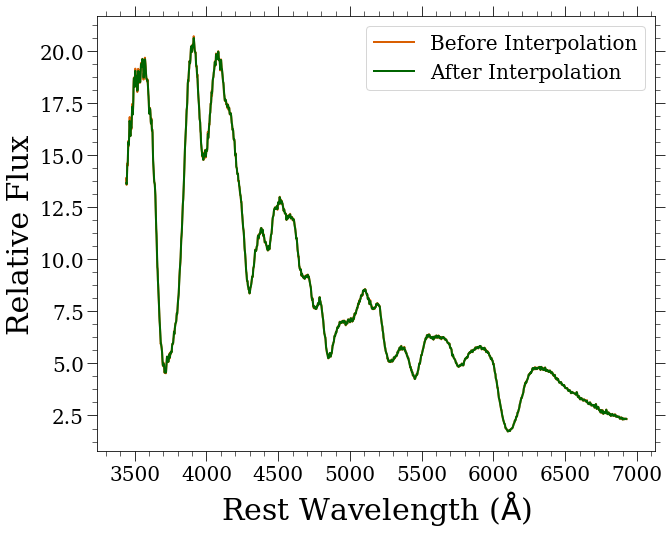

asassn15hg asassn15hg_20150516_goodman_Foundation.dat 57158.0 57131.316 25.9088738573 0.0299174
0.004056053692792142 12.330239758624831


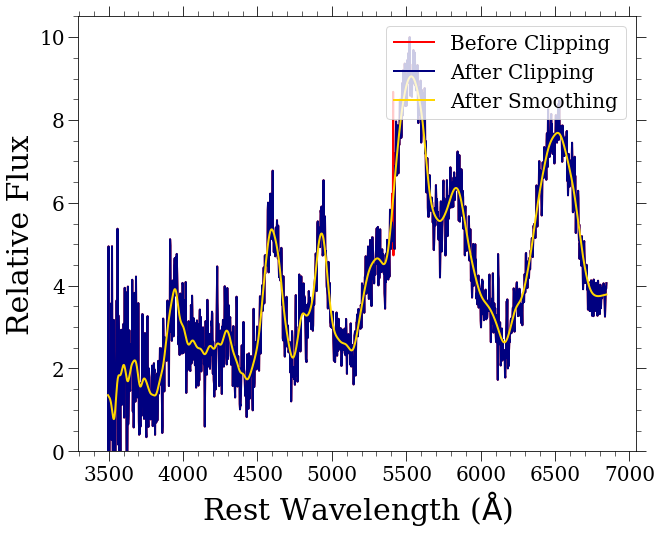

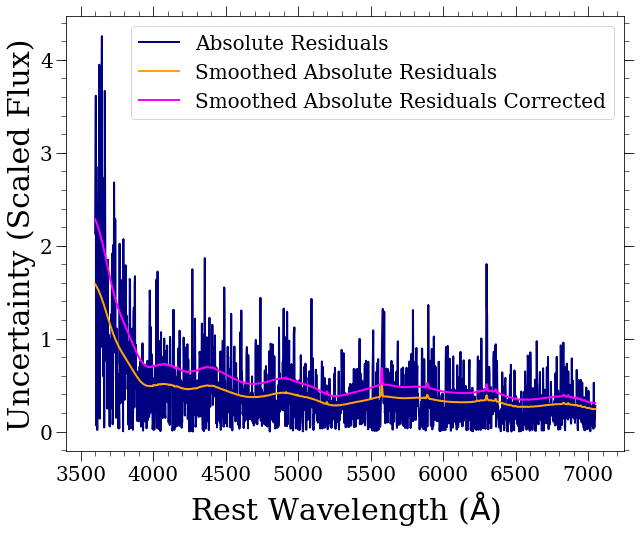

8.242215346832339
Av: 0.13485


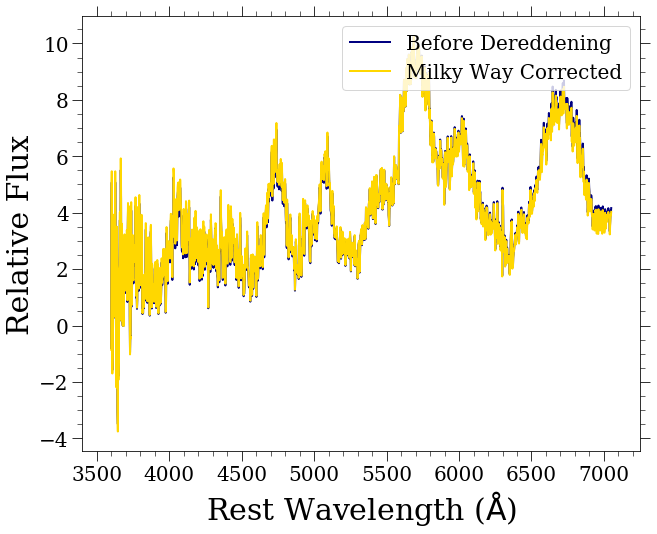

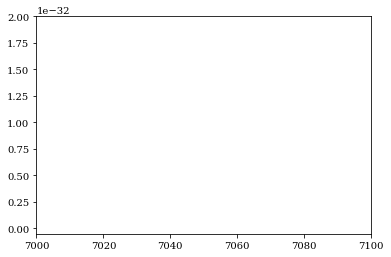

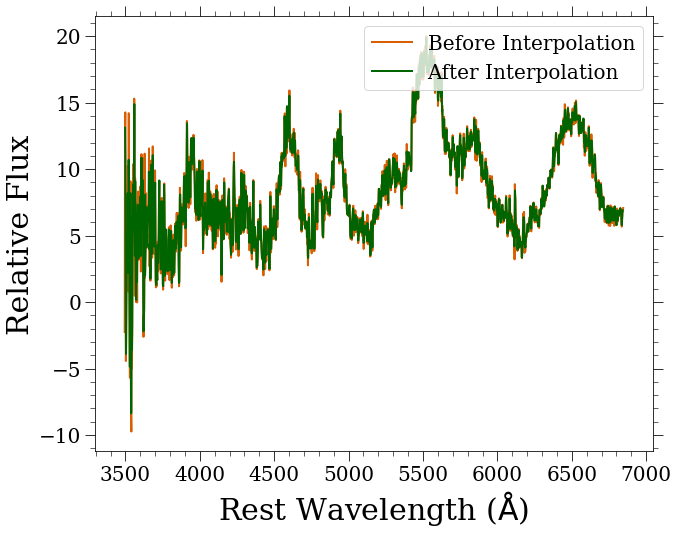

psnj1204 psnj1204_20150616_goodman_Foundation.dat 57189.0 57170.316 17.8991114342 0.0438507
0.0025380842179549843 45.94242100396798


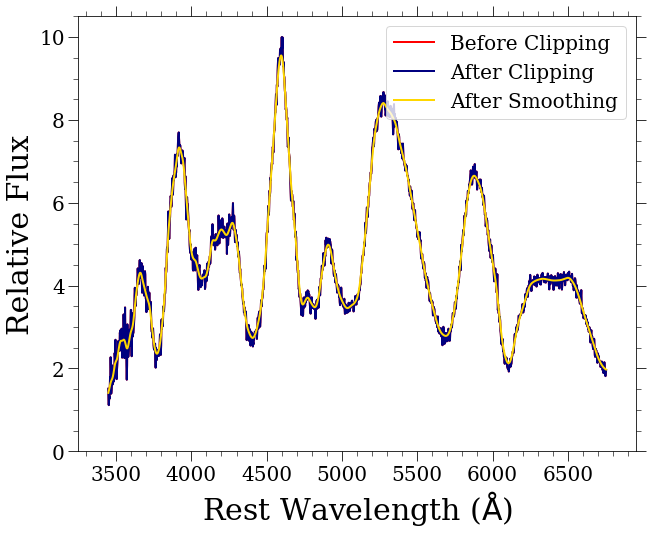

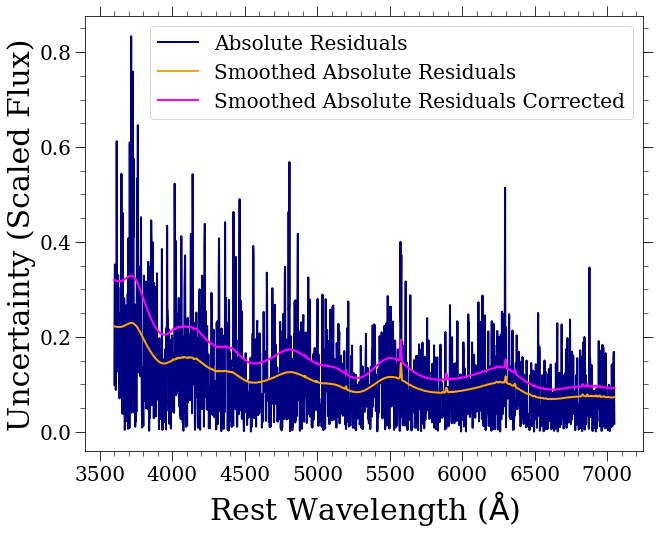

31.30041137425544


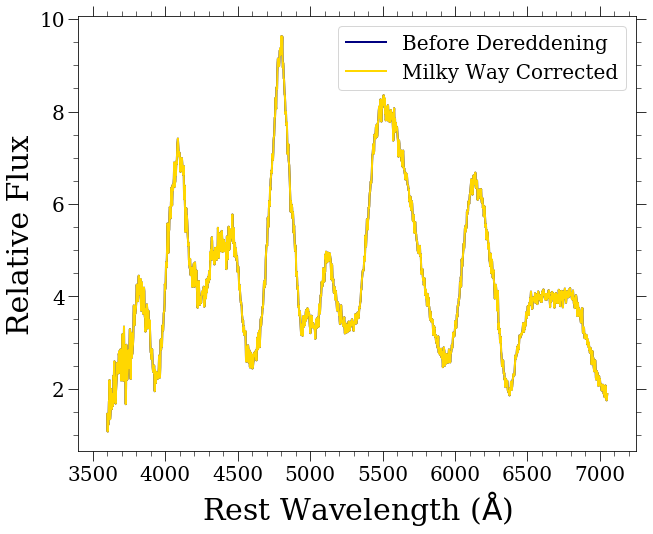

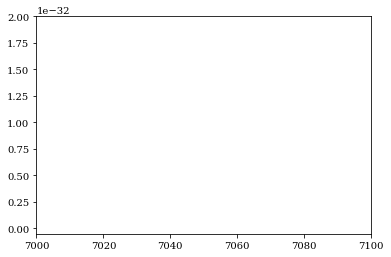

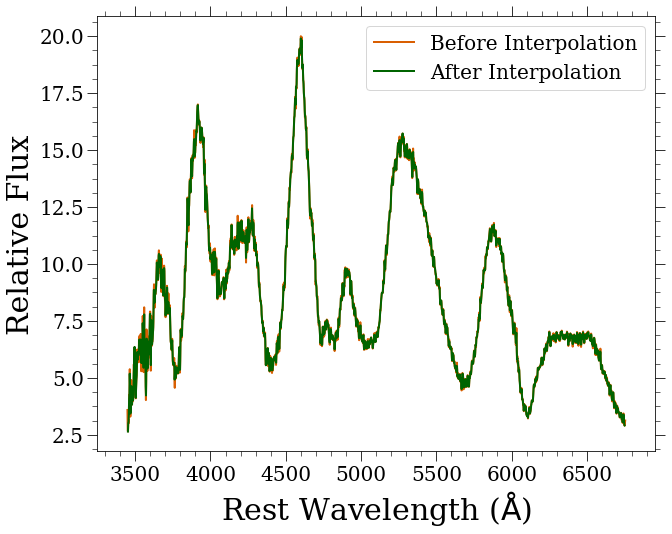

ps15atx ps15atx_20150620_SALT_Foundation.dat 57193.0 57188.906 3.81945740195 0.07188
0.0013211814217170717 72.88812579128033


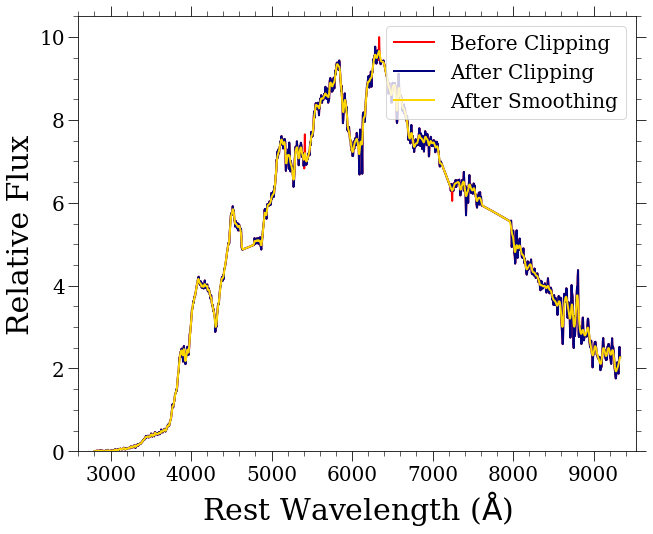

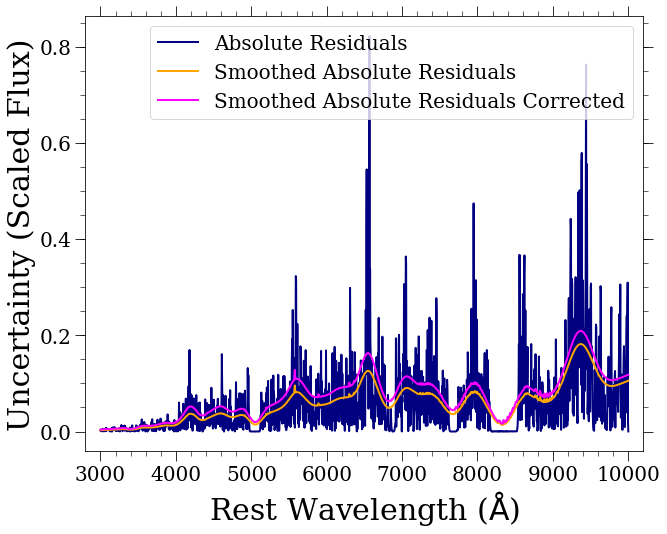

75.82874019768181
Av: 0.33077


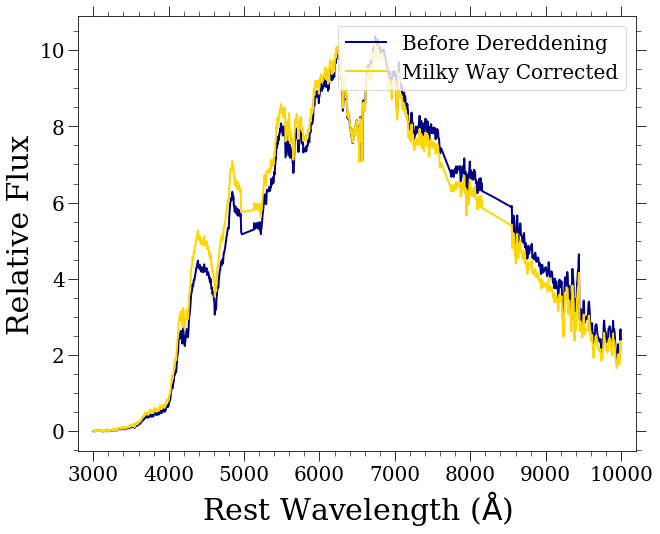

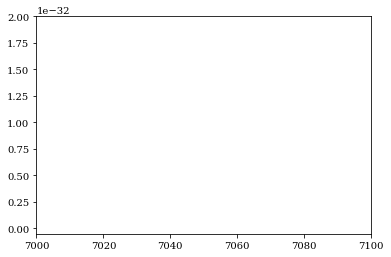

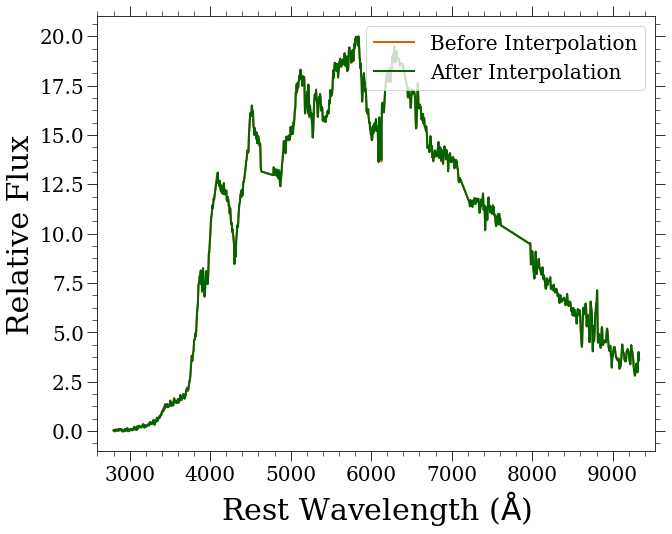

asassn17jq asassn17jq_20170726_kosmos_Foundation.dat 57960.0 None None 0.029899
0.0027753960065853775 40.68765996738189


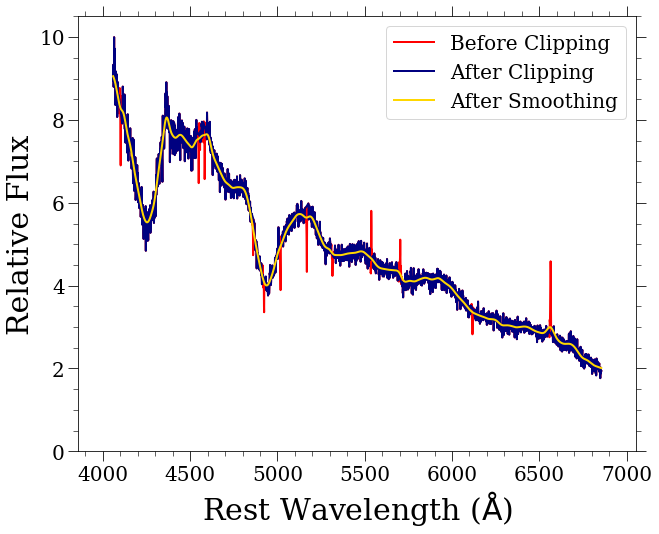

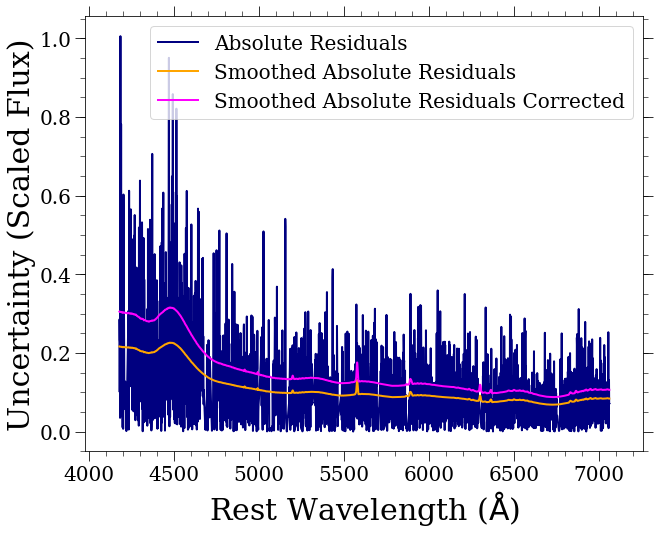

33.80521776880192


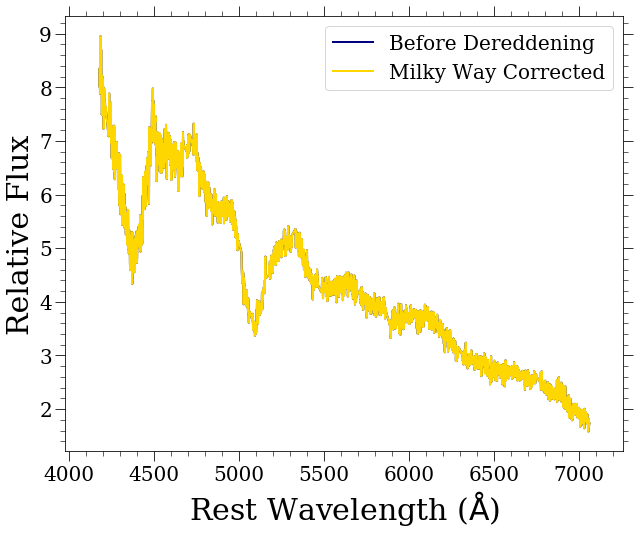

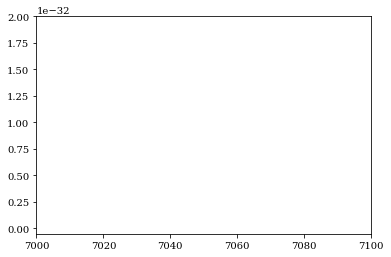

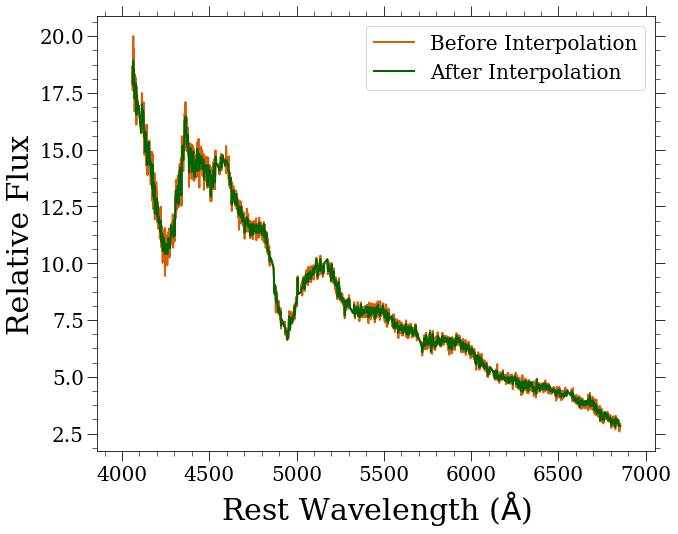

2016hns 2016hns_20161030_goodman_Foundation.dat 57691.0 57697.02 -5.80425581148 0.03717
0.001 92.59550571276986


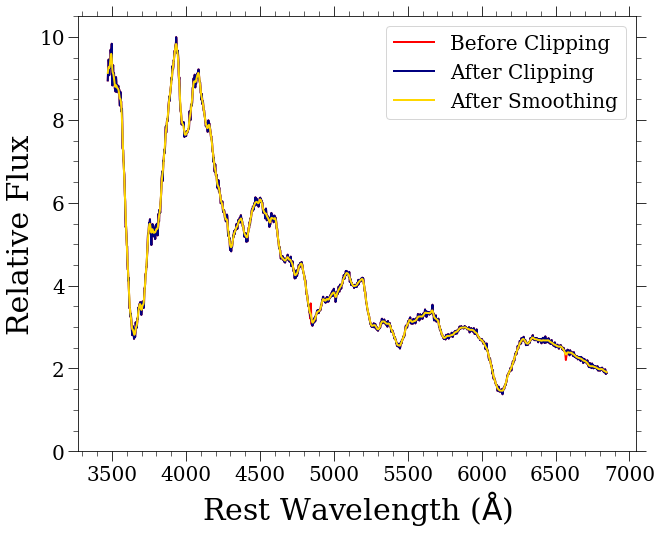

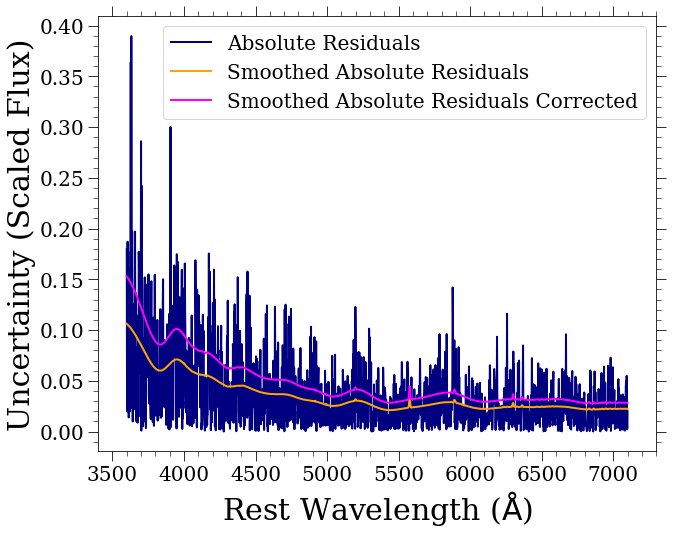

88.92662379344368
Av: 0.19344


KeyboardInterrupt: 

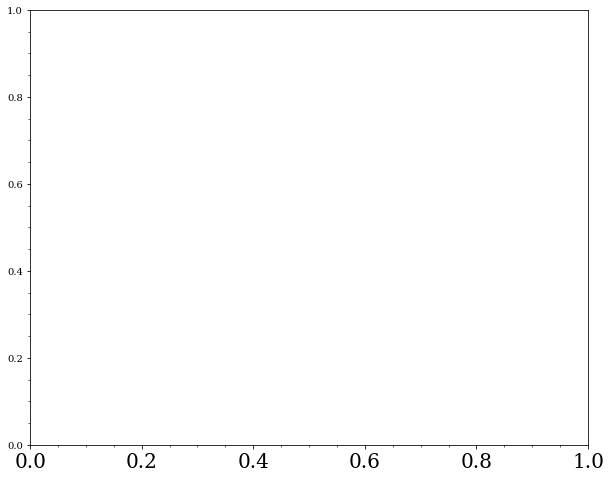

In [43]:
con = sq3.connect('../data/kaepora_v1_DEV.db')
cur = con.cursor()
cur.execute("DELETE FROM Spectra where source = 'foundation'")
num_added = 0

final_redshift_dict = {}
final_mjd_max_dict = {}
no_mw_av = []
for spec_file in files:
    with open(spec_file) as spec:
        filename = spec_file.split('/')[-1]
        spectrum = np.genfromtxt(spec_file)
        min_wave = spectrum[0][0]
        max_wave = spectrum[-1][0]
            
        spec_meta = spec.readlines()[0:6]
#             print m.split('#')[1].split()[-1].strip()
        sn_name = spec_meta[0].split('#')[1].split()[-1].strip().lower()
        date = spec_meta[1].split('#')[1].split()[-1].strip().lower()
        newdate = date[0:4] + '-' + date[4:6] + '-' + date[6:] + 'T00:00:00'
        mjd = Time(newdate, format='isot', scale='utc').mjd
        mjd_max = spec_meta[3].split('#')[1].split()[-1].strip()
        phase = spec_meta[5].split('#')[1].split()[-1].strip()
        redshift = found_zs.get(sn_name,None)
        
        if phase == 'nan' or mjd_max == 'nan':
            phase = None
            mjd_max = None
            
        if (redshift == None or mjd_max == None) and z_dict.get(sn_name,None) != None:
            redshift = z_dict.get(sn_name,None)
            mjd_max = mjd_max_dict.get(sn_name,None)
            phase = (mjd - mjd_max)/(1.+redshift)
            
        source = 'foundation'
        ref = 'Dettman et al. 2020'
#         if redshift != None and spec_file.split('/')[-1] == 'ps15brr_20151011_goodman_Foundation.dat':
        if redshift != None:
            num_added+=1
            final_redshift_dict[sn_name] = redshift
            final_mjd_max_dict[sn_name] = mjd_max
            
            print sn_name, filename, mjd, mjd_max, phase, redshift
            interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing = True, filename=filename)
#             interped = msg.packb(interp_spec)
#             con.execute("""INSERT INTO Spectra(Filename, SN, Source,
#                             Phase, MinWave, MaxWave,
#                             snr, Interpolated_Spectra, 
#                             MJD, Ref)
#                             VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?)""",
#                         (filename, sn_name, source, phase, min_wave, max_wave,
#                          sig_noise, buffer(interped), mjd, ref))
print num_added
# con.commit()

In [7]:
con = sq3.connect('../data/kaepora_v1_DEV.db')
cur = con.cursor()
spec_table = cur.execute('Select SN from Events where MURES')
# spec_table = cur.execute("DELETE from Events where SN like '%-%'")
# con.commit()
# spec_table = cur.execute('UPDATE Events SET SN = ? where SN = asassn-14lp', ('asassn14lp'))
names = [tup[0] for tup in cur.fetchall()]
for name in names:
#     if name.startswith('a'):
    print name

2006te
2006td
1996c
2005m
2010dt
2007su
2009an
2002kf
2007ae
2007aj
2007ap
2007ar
2006et
2006ev
2006eq
2006ef
2006en
2006ej
2004gu
1999cc
2003hu
1997y
1997e
2009le
2008bw
1996bv
1996bl
2007o
2007a
2005M
2007A
2003it
2003iv
2003ic
1994m
1994q
1994s
2002eu
2006gr
2006n
1993ae
2004ef
2004eo
2004ey
1999ef
1999ej
1995ak
2009ad
2009nq
2009na
2000fa
2008hv
2005be
2002de
2002dp
1999dq
2001v
2001g
1993ac
2006is
2008gl
2008gp
2007kk
2000b
2008fr
2005hf
2000dk
2007hu
2006hb
2010a
2010y
ptf10bjs
2003u
2016eoa
2007ob
2001ic
2006je
2004l
2009D
2005el
2000cf
2000cn
2005eq
2007is
2002g
1999x
2001da
2008ds
2007fb
2005hj
2005hc
2003ch
2003cq
2002cr
2002ck
2009kk
2001en
2009kq
2006mp
2005bo
2008cf
2005iq
2006qo
2001fe
2008bz
2008bq
2008bf
2002bz
2002bf
1997dg
2006lu
2006py
2003ae
2001gb
2005ki
2006or
2006ob
2006oa
2006on
2008ar
2008at
2008af
2006mo
2006ax
2006ak
2006al
2006ac
2005kc
2008C
2008y
2008l
2008c
2006sr
2003fa
2007bd
2007bc
2005lu
2005lz
1998dx
1998dk
2007ux
2001az
2001ah
2006bw
2007co
2007cc
2

In [31]:
print found_vels
print final_mjd_max_dict
print final_redshift_dict
print delta_dict
print av_dict
print mw_ebmv_dict
coeffs = [-0.04957799,  0.56115546,  1.11213983]
dm15_dict = {}
dm15_err_dict = {}
for sn in delta_dict.keys():
    dm15 = coeffs[0]*delta_dict[sn]**2. + coeffs[1]*delta_dict[sn] + coeffs[2]
    dm15_dict[sn] = dm15
    dm15_err_dict[sn] = 0.07406417245
print dm15_dict
# anc.add_arbitrary_event_column('Redshift', final_redshift_dict, "float", "../data/kaepora_v1_DEV.db")
# anc.add_arbitrary_event_column('Redshift', final_mjd_max_dict, "float", "../data/kaepora_v1_DEV.db")

# data_dict = {}
# for line in data_meta.readlines():
#     data_dict[line.split()[0]] = line.split()
# for sn in data_dict.keys():
#     dm15 = float(data_dict[sn][1])
#     dm15_err = float(data_dict[sn][2])
#     v_at_max = float(data_dict[sn][3])
#     av = float(data_dict[sn][5])*3.1
#     ned_host = data_dict[sn][7]
#     print sn, dm15, dm15_err, v_at_max, av, ned_host
#     cur.execute("UPDATE Photometry SET dm15_source = ? where SN = ?", (dm15, sn))
#     cur.execute("UPDATE Photometry SET e_dm15 = ? where SN = ?", (dm15_err, sn))
#     cur.execute("UPDATE Photometry SET v_at_max = ? where SN = ?", (v_at_max, sn))
#     cur.execute("UPDATE Photometry SET av_mlcs31 = ? where SN = ?", (av, sn))
#     cur.execute("UPDATE Photometry SET NED_host = ? where SN = ?", (ned_host, sn))

{'ps15bwh': -11.24996, '2017cpu': -11.45211, 'ps15brr': None, '2018cnw': None, '2016gfr': -12.28006, 'asassn15mf': None, 'ps16bnz': None, 'atlas16dpb': -11.32242, '2016glp': -16.98809, 'ps15bsq': None, '2017fnz': None, 'ps15bst': -10.62989, '2016bew': None, 'ps15akf': None, '2016glz': -14.74492, 'ps15atx': -14.89481, 'ps15bjg': -12.25388, '2017ckx': -9.91393, 'ps15cfn': -10.11722, 'psnj1602': None, 'ps16aer': None, 'gaia16acv': None, 'ps16ccn': None, 'asassn15il': None, '2016ac': None, 'asassn15od': None, 'ps16eqv': None, '2017po': None, '2017erp': None, '2016hnk': None, 'ps15ahs': -9.43003, 'ps15bbn': None, '2017oz': None, 'ps16em': None, 'ps16fbb': -10.07551, 'asassn15lg': None, 'asassn15bm': None, 'asassn16dn': None, 'asassn15uw': None, '2016gmb': None, 'ps15zn': None, 'asassn16fs': None, 'asassn16hz': None, 'asassn15sf': None, '2017fmz': None, 'asassn17jq': None, 'ps16ayd': None, 'ps15mt': None, 'ps15adh': None, '2017fms': None, 'ps16n': -10.25725, 'ps16cqa': None, 'ps15bif': -10.9